#Install Library


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import cufflinks as cf

import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import sklearn.metrics as metrics
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

#Import data

In [2]:
from __future__ import print_function
import os
#data Path has to be set as per the file location in your system
#data_path = ['..', 'data']
data_path = ['data']

filepath = os.sep.join(data_path + ['G4_Diabetes_Dataset.csv'])
data = pd.read_csv(filepath)

#1. Analysis data

In [3]:
data.head()

Age Gender Family_Diabetes highBP      PhysicallyActive   BMI Smoking  \
0  50-59   Male              no    yes        one hr or more  39.0      no   
1  50-59   Male              no    yes  less than half an hr  28.0      no   
2  40-49   Male              no     no        one hr or more  24.0      no   
3  50-59   Male              no     no        one hr or more  23.0      no   
4  40-49   Male              no     no  less than half an hr  27.0      no   

  Alcohol  Sleep  SoundSleep RegularMedicine      JunkFood     Stress BPLevel  \
0      no      8           6              no  occasionally  sometimes    high   
1      no      8           6             yes    very often  sometimes  normal   
2      no      6           6              no  occasionally  sometimes  normal   
3      no      8           6              no  occasionally  sometimes  normal   
4      no      8           8              no  occasionally  sometimes  normal   

   Pregancies Pdiabetes UriationFreq Diabetic  
0         0.0         0     not much       no  
1         0.0         0     not much       no  
2         0.0         0     not much       no  
3         0.0         0     not much       no  
4         0.0         0     not much       no

In [4]:
data.shape

(952, 18)

In [5]:
#Get the data type of each column
data.dtypes

Age                  object
Gender               object
Family_Diabetes      object
highBP               object
PhysicallyActive     object
BMI                 float64
Smoking              object
Alcohol              object
Sleep                 int64
SoundSleep            int64
RegularMedicine      object
JunkFood             object
Stress               object
BPLevel              object
Pregancies          float64
Pdiabetes            object
UriationFreq         object
Diabetic             object
dtype: object

In [6]:
#Idenfity the unique data of each column
print(data.nunique())

Age                  4
Gender               2
Family_Diabetes      2
highBP               2
PhysicallyActive     4
BMI                 26
Smoking              2
Alcohol              2
Sleep                8
SoundSleep          12
RegularMedicine      3
JunkFood             4
Stress               4
BPLevel              6
Pregancies           5
Pdiabetes            3
UriationFreq         2
Diabetic             3
dtype: int64


In [7]:
for col_name in data.columns:
  print(data[col_name].unique())

['50-59' '40-49' 'less than 40' '60 or older']
['Male' 'Female']
['no' 'yes']
['yes' 'no']
['one hr or more' 'less than half an hr' 'none' 'more than half an hr']
[39. 28. 24. 23. 27. 21. 20. 26. 22. 15. 34. 30. 29. 18. 32. 31. 36. 38.
 40. 35. 19. 33. 17. 25. nan 42. 45.]
['no' 'yes']
['no' 'yes']
[ 8  6 10  7 11  9  4  5]
[ 6  8 10  7 11  4  9  5  3  2  1  0]
['no' 'yes' 'o']
['occasionally' 'very often' 'often' 'always']
['sometimes' 'not at all' 'very often' 'always']
['high' 'normal' 'low' 'Low' 'High' 'normal ']
[ 0.  1.  2.  3.  4. nan]
['0' 'yes' nan 'no']
['not much' 'quite often']
['no' 'yes' ' no' nan]


In BPlevel, we replace Low to low, delete the space after 'normal ' and replace 'High' to 'high'

In [8]:
data['BPLevel'] = data.BPLevel.str.replace('Low','low')
data['BPLevel'] = data.BPLevel.str.replace(' ','')
data['BPLevel'] = data.BPLevel.str.replace('High','high')

In RegularMedicine column, we replace o to no

In [9]:
data['RegularMedicine'] = data.RegularMedicine.str.replace('no','o')
data['RegularMedicine'] = data.RegularMedicine.str.replace('o','no')

In Pdiabetes column, we replace 0 to no

In [10]:
data['Pdiabetes'] = data.Pdiabetes.str.replace('0','no')

We found that there is a typo in Diabetic. So we change the ' no' to 'no'

In [11]:
data['Diabetic'] = data.Diabetic.str.replace(' ','')

Check again the data unique

In [12]:
for col_name in data.columns:
  print(data[col_name].unique())

['50-59' '40-49' 'less than 40' '60 or older']
['Male' 'Female']
['no' 'yes']
['yes' 'no']
['one hr or more' 'less than half an hr' 'none' 'more than half an hr']
[39. 28. 24. 23. 27. 21. 20. 26. 22. 15. 34. 30. 29. 18. 32. 31. 36. 38.
 40. 35. 19. 33. 17. 25. nan 42. 45.]
['no' 'yes']
['no' 'yes']
[ 8  6 10  7 11  9  4  5]
[ 6  8 10  7 11  4  9  5  3  2  1  0]
['no' 'yes']
['occasionally' 'very often' 'often' 'always']
['sometimes' 'not at all' 'very often' 'always']
['high' 'normal' 'low']
[ 0.  1.  2.  3.  4. nan]
['no' 'yes' nan]
['not much' 'quite often']
['no' 'yes' nan]


##1.1 Missing value analysis

In [13]:
# CHECKING MISSING VALUE
data.isnull().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

We found that there is some missing value in BMI, Pregancies, Pdiabetes and Diabetic



I am going to replace missing value to mean value in BMI

In [14]:
data['BMI'].fillna(value=data['BMI'].mean(), inplace=True)

I assume that the missing value in Pregancies as 0 so i replace it with 0

In [15]:
data['Pregancies'] = data['Pregancies'].fillna(0)

In [16]:
data['Pregancies'] = data['Pregancies'].astype(str)

drop the leftover missing value

In [17]:
data.dropna(inplace=True)

check the missing value again

In [18]:
# CHECKING MISSING VALUE
data.isnull().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
Pdiabetes           0
UriationFreq        0
Diabetic            0
dtype: int64

Check the data unique again

In [19]:
for col_name in data.columns:
  print(data[col_name].unique())

['50-59' '40-49' 'less than 40' '60 or older']
['Male' 'Female']
['no' 'yes']
['yes' 'no']
['one hr or more' 'less than half an hr' 'none' 'more than half an hr']
[39.         28.         24.         23.         27.         21.
 20.         26.         22.         15.         34.         30.
 29.         18.         32.         31.         36.         38.
 40.         35.         19.         33.         17.         25.
 25.76371308 42.         45.        ]
['no' 'yes']
['no' 'yes']
[ 8  6 10  7 11  9  4  5]
[ 6  8 10  7 11  4  9  5  3  2  1  0]
['no' 'yes']
['occasionally' 'very often' 'often' 'always']
['sometimes' 'not at all' 'very often' 'always']
['high' 'normal' 'low']
['0.0' '1.0' '2.0' '3.0' '4.0']
['no' 'yes']
['not much' 'quite often']
['no' 'yes']


#2. Exploratory Data Analysis

##2.1 Distribution

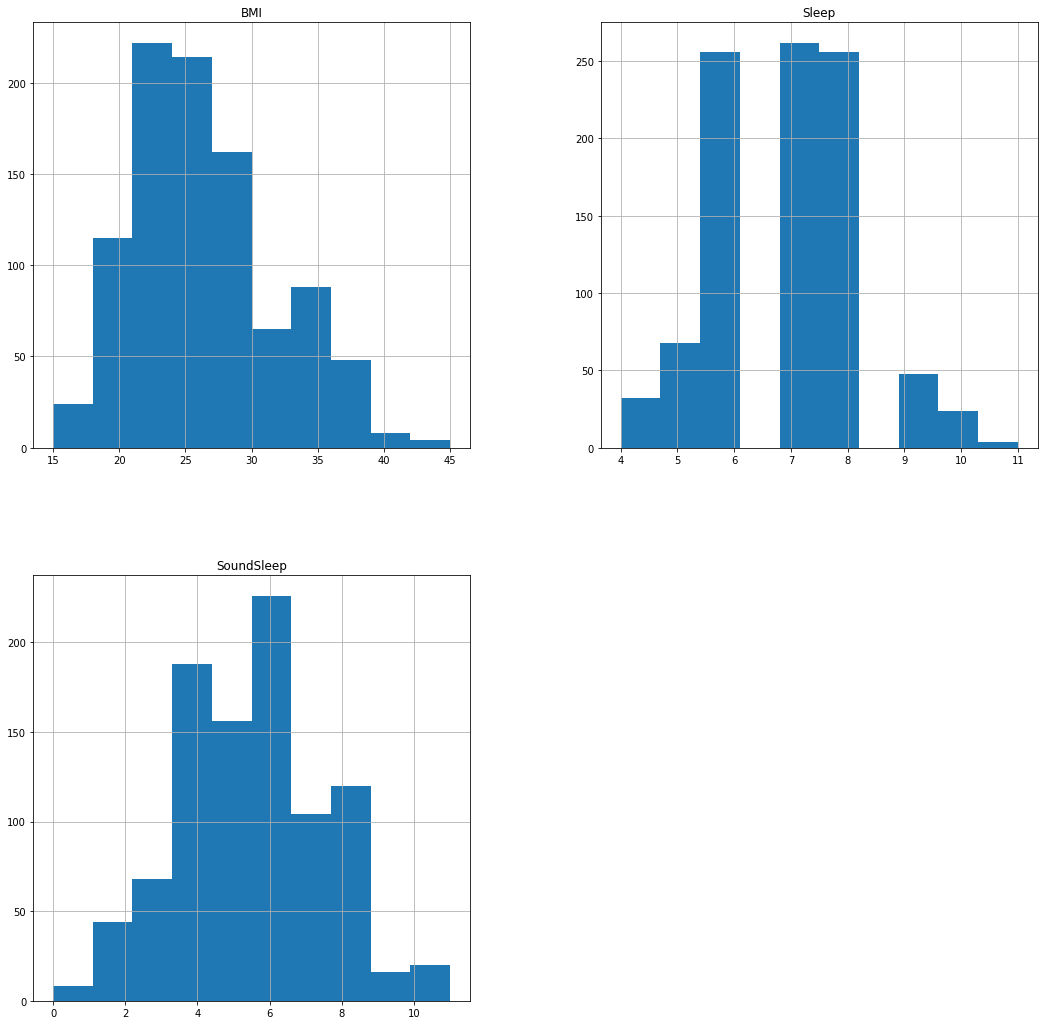

In [20]:
data.hist(figsize = (18,18))
plt.show()

                 Diabetic
Gender Diabetic          
Female no        0.698113
       yes       0.301887
Male   no        0.734024
       yes       0.265976


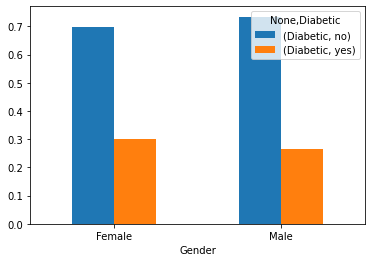

In [21]:
plot2=pd.DataFrame(data.groupby('Gender')['Diabetic'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

In [22]:
plot2=pd.DataFrame(data.groupby('Age')['Diabetic'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

                       Diabetic
Age          Diabetic          
40-49        no        0.695122
             yes       0.304878
50-59        no        0.538462
             yes       0.461538
60 or older  yes       0.777778
             no        0.222222
less than 40 no        0.934156
             yes       0.065844


                          Diabetic
Family_Diabetes Diabetic          
no              no        0.831325
                yes       0.168675
yes             no        0.597345
                yes       0.402655


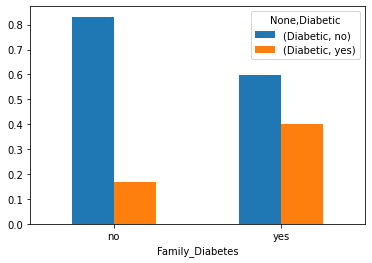

In [23]:
plot2=pd.DataFrame(data.groupby('Family_Diabetes')['Diabetic'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

In [24]:
plot2=pd.DataFrame(data.groupby('highBP')['Diabetic'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

                 Diabetic
highBP Diabetic          
no     no        0.814404
       yes       0.185596
yes    yes       0.578947
       no        0.421053


                               Diabetic
PhysicallyActive     Diabetic          
less than half an hr no        0.752976
                     yes       0.247024
more than half an hr no        0.763838
                     yes       0.236162
none                 no        0.583333
                     yes       0.416667
one hr or more       no        0.696682
                     yes       0.303318


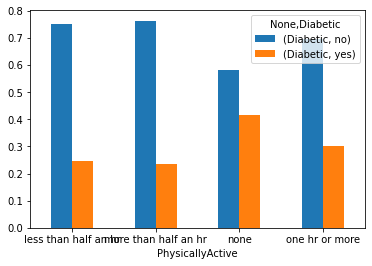

In [25]:
plot2=pd.DataFrame(data.groupby('PhysicallyActive')['Diabetic'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

                  Diabetic
Smoking Diabetic          
no      no        0.718527
        yes       0.281473
yes     no        0.731481
        yes       0.268519


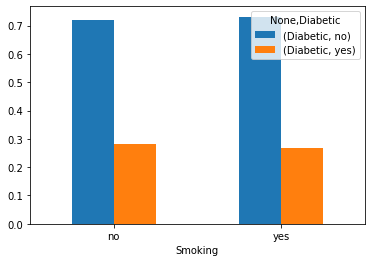

In [26]:
plot2=pd.DataFrame(data.groupby('Smoking')['Diabetic'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

                  Diabetic
Alcohol Diabetic          
no      no        0.734828
        yes       0.265172
yes     no        0.661458
        yes       0.338542


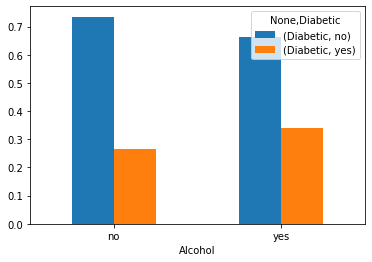

In [27]:
plot2=pd.DataFrame(data.groupby('Alcohol')['Diabetic'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

                Diabetic
Sleep Diabetic          
4     yes       0.625000
      no        0.375000
5     no        0.647059
      yes       0.352941
6     no        0.746094
      yes       0.253906
7     no        0.767176
      yes       0.232824
8     no        0.703125
      yes       0.296875
9     no        0.750000
      yes       0.250000
10    no        0.666667
      yes       0.333333
11    no        1.000000


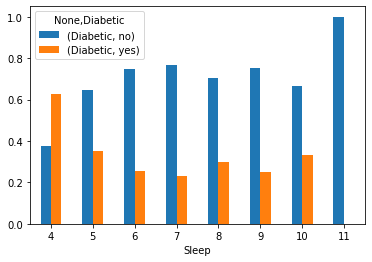

In [28]:
plot2=pd.DataFrame(data.groupby('Sleep')['Diabetic'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

                     Diabetic
SoundSleep Diabetic          
0          no        1.000000
1          no        1.000000
2          yes       0.545455
           no        0.454545
3          no        0.750000
           yes       0.250000
4          no        0.744681
           yes       0.255319
5          no        0.769231
           yes       0.230769
6          no        0.734513
           yes       0.265487
7          no        0.692308
           yes       0.307692
8          no        0.691667
           yes       0.308333
9          no        0.500000
           yes       0.500000
10         no        0.750000
           yes       0.250000
11         no        1.000000


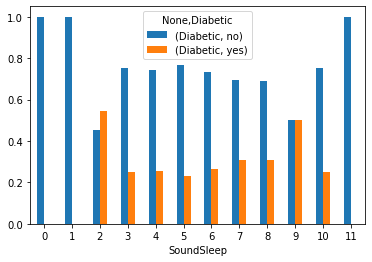

In [29]:
plot2=pd.DataFrame(data.groupby('SoundSleep')['Diabetic'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

                          Diabetic
RegularMedicine Diabetic          
no              no        0.918567
                yes       0.081433
yes             yes       0.642857
                no        0.357143


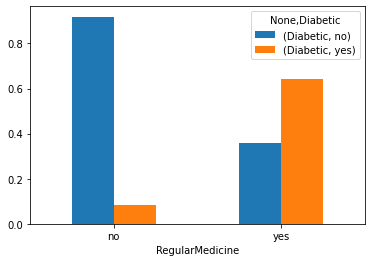

In [30]:
plot2=pd.DataFrame(data.groupby('RegularMedicine')['Diabetic'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

                       Diabetic
JunkFood     Diabetic          
always       no        0.818182
             yes       0.181818
occasionally no        0.700000
             yes       0.300000
often        no        0.771739
             yes       0.228261
very often   no        0.711538
             yes       0.288462


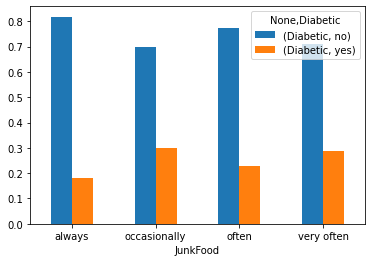

In [31]:

plot2=pd.DataFrame(data.groupby('JunkFood')['Diabetic'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

                     Diabetic
Stress     Diabetic          
always     yes       0.647727
           no        0.352273
not at all no        0.716418
           yes       0.283582
sometimes  no        0.797872
           yes       0.202128
very often no        0.652439
           yes       0.347561


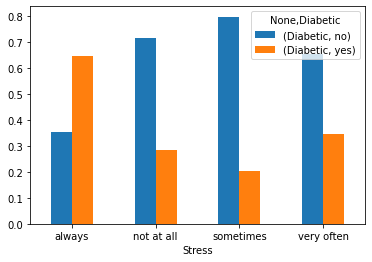

In [32]:

plot2=pd.DataFrame(data.groupby('Stress')['Diabetic'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

                  Diabetic
BPLevel Diabetic          
high    yes       0.643519
        no        0.356481
low     no        1.000000
normal  no        0.820113
        yes       0.179887


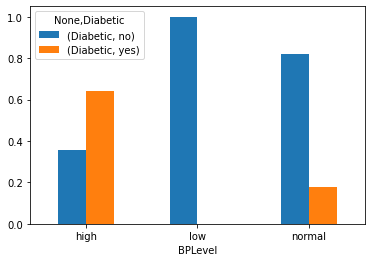

In [33]:

plot2=pd.DataFrame(data.groupby('BPLevel')['Diabetic'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

                     Diabetic
Pregancies Diabetic          
0.0        no        0.759446
           yes       0.240554
1.0        no        0.785714
           yes       0.214286
2.0        no        0.562500
           yes       0.437500
3.0        yes       0.616667
           no        0.383333
4.0        yes       1.000000


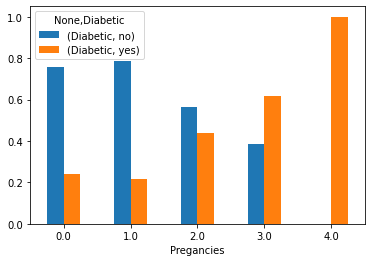

In [34]:
plot2=pd.DataFrame(data.groupby('Pregancies')['Diabetic'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

                    Diabetic
Pdiabetes Diabetic          
no        no        0.728632
          yes       0.271368
yes       yes       0.857143
          no        0.142857


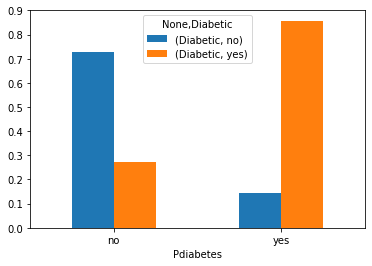

In [35]:
plot2=pd.DataFrame(data.groupby('Pdiabetes')['Diabetic'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

                       Diabetic
UriationFreq Diabetic          
not much     no        0.749245
             yes       0.250755
quite often  no        0.652778
             yes       0.347222


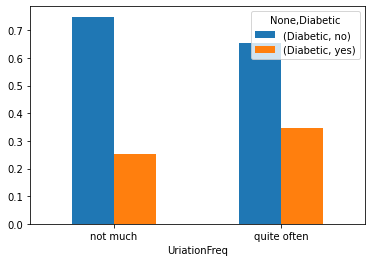

In [36]:
plot2=pd.DataFrame(data.groupby('UriationFreq')['Diabetic'].value_counts(normalize=True))
plot2.unstack().plot(kind='bar')
plt.xticks(rotation=0)
print(plot2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



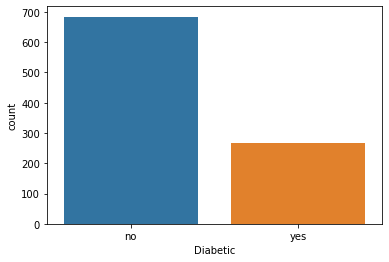

In [37]:
# visualize the target variable
g = sns.countplot(data['Diabetic'])
plt.show()



The data is imbalance because the ratio is 2:1.


##2.2 Correlation

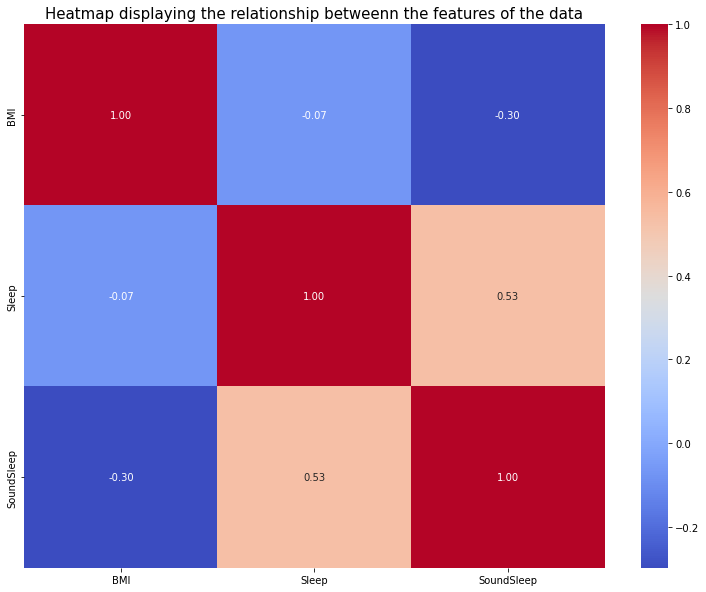

In [38]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.title('Heatmap displaying the relationship betweenn the features of the data',
         fontsize=15)
plt.show()

##2.3 Outliers

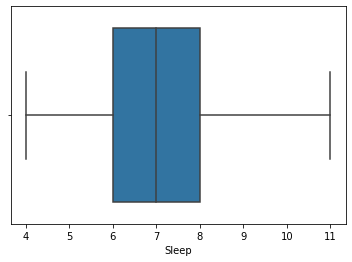

In [39]:
import seaborn as sns
sns.boxplot(x=data['Sleep'])

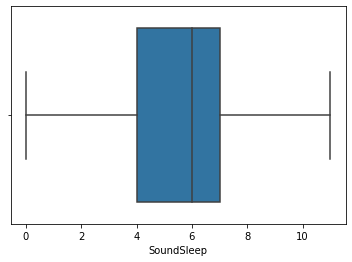

In [40]:
sns.boxplot(x=data['SoundSleep'])

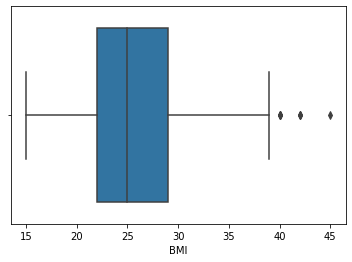

In [41]:
sns.boxplot(x=data['BMI'])

There are three outliers between the 40 to 45, so now we need to correct it

In [42]:
q1 = percentile25 = data['BMI'].quantile(0.25)
q3 = percentile75 = data['BMI'].quantile(0.75)
iqr = q3-q1

In [43]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [44]:
data[data['BMI'] > upper_limit]
data[data['BMI'] < lower_limit]

Empty DataFrame
Columns: [Age, Gender, Family_Diabetes, highBP, PhysicallyActive, BMI, Smoking, Alcohol, Sleep, SoundSleep, RegularMedicine, JunkFood, Stress, BPLevel, Pregancies, Pdiabetes, UriationFreq, Diabetic]
Index: []

In [45]:
new_data = data[data['BMI'] < upper_limit]
new_data.shape

(942, 18)

In [46]:
sns.boxplot(new_data['BMI'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



We cap outliers data and make the limit. above a specific value or less than that value, all the values will be considered as outliers, and the number of outliers in the dataset gives that capping number.

In [47]:

data['BMI'] = np.where(
    data['BMI'] > upper_limit,
    upper_limit,
    np.where(
        data['BMI'] < lower_limit,
        lower_limit,
        data['BMI']
    )
)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



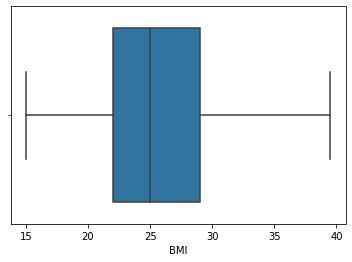

In [48]:
sns.boxplot(data['BMI'])
plt.show()

We can see that the oulier of BMI has been deleted

##2.4 Skewness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



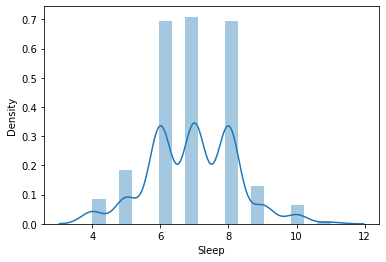

In [49]:
sns_plot = sns.distplot(data["Sleep"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



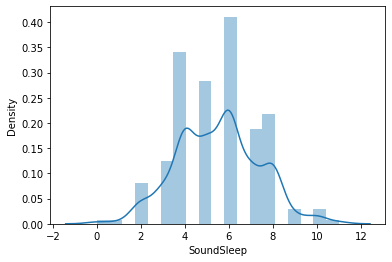

In [50]:
sns_plot = sns.distplot(data["SoundSleep"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



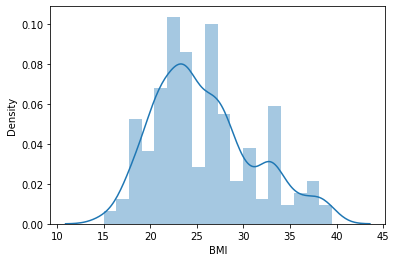

In [51]:
sns_plot = sns.distplot(data["BMI"])

In [52]:
skew = pd.DataFrame(data.skew(numeric_only=True))
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

skew  too_skewed
BMI         0.578558       False
Sleep       0.058039       False
SoundSleep  0.078318       False

Sleep, SoundSleep and BMI are continuos variable. Skew of this 3 column is not larger than 0.75 which mean it is not skew

#3. Train Test Split


##3.1 Encode data

We encode all the object data type except Sleep, SoundSleep because they are float and int

In [53]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
for col_name in data.columns: 
    if col_name == 'Sleep' or col_name == 'SoundSleep' or col_name == 'BMI':
      continue
    data[col_name]= label_encoder.fit_transform(data[col_name])

In [54]:
for col_name in data.columns:
  print(data[col_name].unique())

[1 0 3 2]
[1 0]
[0 1]
[1 0]
[3 0 2 1]
[39.         28.         24.         23.         27.         21.
 20.         26.         22.         15.         34.         30.
 29.         18.         32.         31.         36.         38.
 39.5        35.         19.         33.         17.         25.
 25.76371308]
[0 1]
[0 1]
[ 8  6 10  7 11  9  4  5]
[ 6  8 10  7 11  4  9  5  3  2  1  0]
[0 1]
[1 3 2 0]
[2 1 3 0]
[0 2 1]
[0 1 2 3 4]
[0 1]
[0 1]
[0 1]


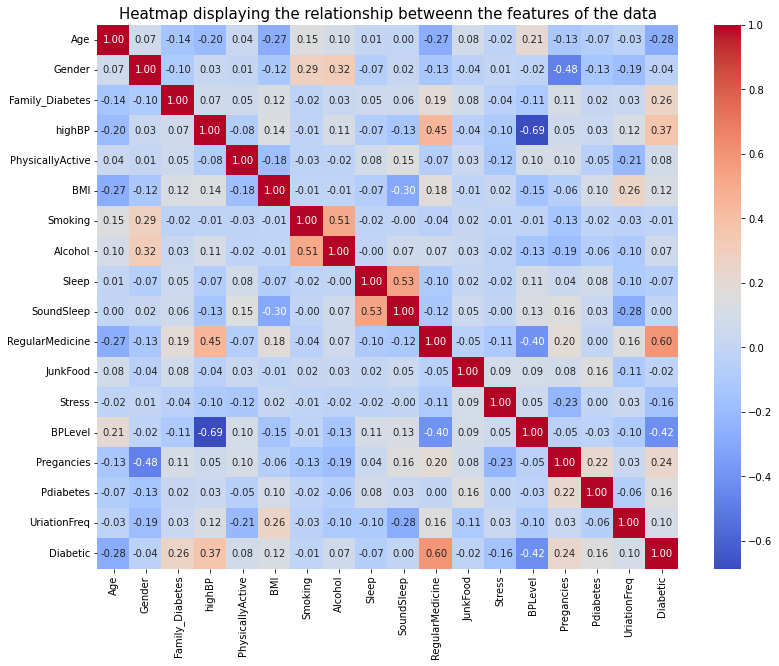

In [55]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.title('Heatmap displaying the relationship betweenn the features of the data',
         fontsize=15)
plt.show()

In [56]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)

x_data = data[data.columns[:-1]]
y = data.Diabetic

for train,test in strat_shuf_split.split(x_data,y):     #this will splits the index
    X_train = x_data.iloc[train]
    y_train = y.iloc[train]
    X_test = x_data.iloc[test]
    y_test = y.iloc[test]
print(y_train.value_counts())  
print(y_test.value_counts())

0    479
1    186
Name: Diabetic, dtype: int64
0    205
1     80
Name: Diabetic, dtype: int64


In [57]:
X_train_log = X_train
X_test_log = X_test
y_test_log = y_test
y_train_log = y_train

In [58]:
#Getting data for naive bayes model
X_train_naive = X_train
X_test_naive = X_test
y_test_naive = y_test
y_train_naive = y_train

In [59]:
#Getting data for decision tree model
X_train_dt = X_train
X_test_dt = X_test
y_test_dt = y_test
y_train_dt = y_train

In [60]:
#Getting data for decision tree model
X_train_svm = X_train
X_test_svm = X_test
y_test_svm = y_test
y_train_svm = y_train

In [61]:
#Getting data for neural network model
X_train_nn = X_train
X_test_nn = X_test
y_test_nn = y_test
y_train_nn = y_train

In [62]:
X_train

Age  Gender  Family_Diabetes  highBP  PhysicallyActive   BMI  Smoking  \
887    2       1                0       1                 0  33.0        0   
87     2       1                0       1                 0  15.0        0   
813    1       1                0       0                 0  26.0        0   
746    2       1                0       1                 2  26.0        0   
102    3       1                0       1                 0  24.0        0   
..   ...     ...              ...     ...               ...   ...      ...   
66     1       0                1       0                 2  21.0        0   
793    2       1                1       1                 0  26.0        0   
794    3       1                0       0                 3  24.0        0   
179    0       1                1       0                 2  24.0        0   
421    3       0                1       0                 2  18.0        0   

     Alcohol  Sleep  SoundSleep  RegularMedicine  JunkFood  Stress  BPLevel  \
887        0      6           2                1         1       3        0   
87         0      4           4                1         1       3        0   
813        0      6           6                0         1       2        2   
746        0      4           4                1         1       1        0   
102        0      8           8                0         1       3        2   
..       ...    ...         ...              ...       ...     ...      ...   
66         0      8           5                1         1       2        2   
793        1      6           6                1         1       1        0   
794        0      7           7                0         2       2        2   
179        0      8           8                0         1       2        2   
421        0      8           8                1         2       2        2   

     Pregancies  Pdiabetes  UriationFreq  
887           0          0             1  
87            0          0             1  
813           0          0             0  
746           0          0             0  
102           0          0             0  
..          ...        ...           ...  
66            0          0             0  
793           0          0             0  
794           0          0             0  
179           0          0             0  
421           0          0             0  

[665 rows x 17 columns]

In [63]:
X_test


Age  Gender  Family_Diabetes  highBP  PhysicallyActive   BMI  Smoking  \
685    3       1                0       0                 1  21.0        0   
191    3       1                1       1                 1  27.0        0   
140    3       0                1       0                 1  24.0        0   
486    3       1                0       0                 2  20.0        0   
660    3       0                1       0                 2  20.0        0   
..   ...     ...              ...     ...               ...   ...      ...   
125    3       0                0       1                 3  30.0        0   
563    2       1                0       1                 0  15.0        0   
446    3       1                0       1                 0  26.0        0   
526    2       1                0       0                 2  18.0        0   
547    2       0                1       1                 0  19.0        0   

     Alcohol  Sleep  SoundSleep  RegularMedicine  JunkFood  Stress  BPLevel  \
685        0      7           4                0         1       2        2   
191        0      7           5                0         1       2        0   
140        0      8           8                1         2       2        2   
486        0      7           7                0         1       1        2   
660        0      9           9                0         2       2        2   
..       ...    ...         ...              ...       ...     ...      ...   
125        0      7           3                0         1       2        2   
563        0      4           4                1         1       3        0   
446        0      6           4                0         3       2        2   
526        0      5           5                0         1       2        2   
547        0      9           9                1         1       0        0   

     Pregancies  Pdiabetes  UriationFreq  
685           0          0             1  
191           0          0             0  
140           0          0             1  
486           0          0             0  
660           0          0             0  
..          ...        ...           ...  
125           0          0             0  
563           0          0             1  
446           0          0             1  
526           0          0             0  
547           4          0             1  

[285 rows x 17 columns]

In [64]:
y_train

887    1
87     0
813    0
746    1
102    0
      ..
66     1
793    0
794    0
179    1
421    0
Name: Diabetic, Length: 665, dtype: int64

In [65]:
y_test

685    0
191    0
140    0
486    0
660    0
      ..
125    0
563    0
446    0
526    0
547    1
Name: Diabetic, Length: 285, dtype: int64

In [66]:
y_test.value_counts(normalize=True)

0    0.719298
1    0.280702
Name: Diabetic, dtype: float64

In [67]:
y_train.value_counts(normalize=True)

0    0.720301
1    0.279699
Name: Diabetic, dtype: float64

##3.2 Pairwise correlation

## Age

### Age vs Alcohol, BMI, BPLevel, Family_Diabetes, Gender

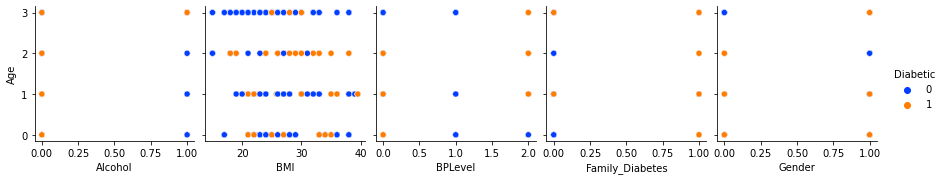

### Age vs JunkFood, Pdiabetes, PhysicallyActive, Pregancies, RegularMedicine

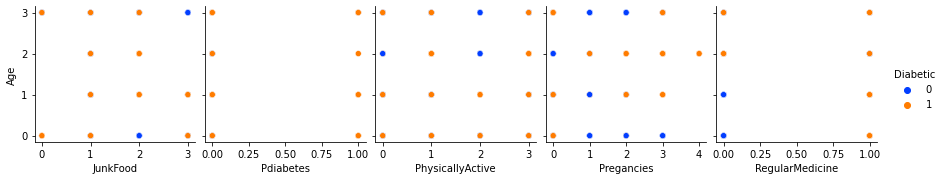

### Age vs Sleep, Smoking, SoundSleep, Stress, UriationFreq

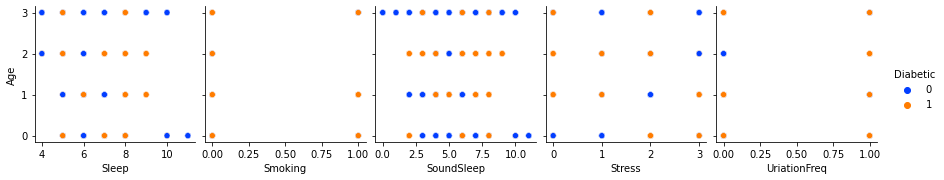

### Age vs highBP

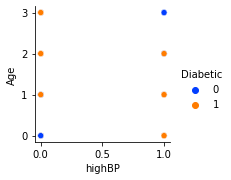

## Alcohol

### Alcohol vs Age, BMI, BPLevel, Family_Diabetes, Gender

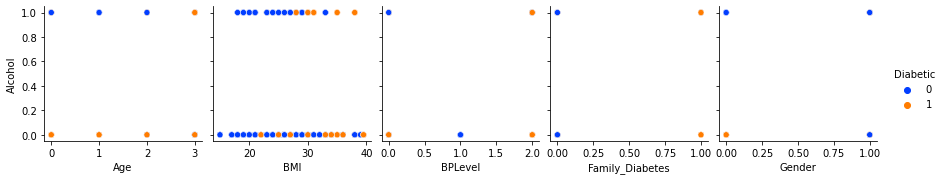

### Alcohol vs JunkFood, Pdiabetes, PhysicallyActive, Pregancies, RegularMedicine

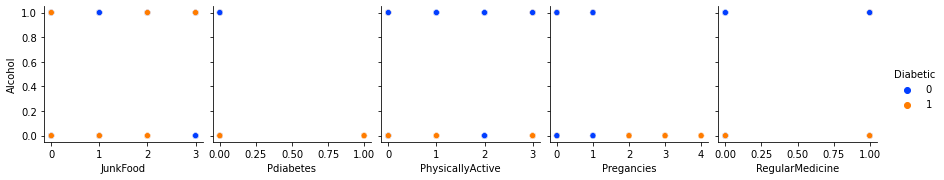

### Alcohol vs Sleep, Smoking, SoundSleep, Stress, UriationFreq

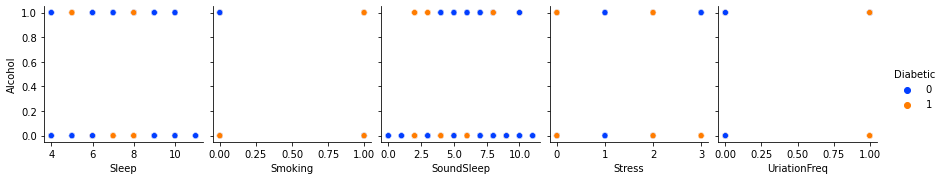

### Alcohol vs highBP

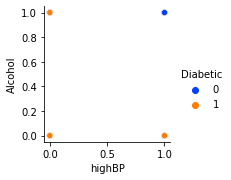

## BMI

### BMI vs Age, Alcohol, BPLevel, Family_Diabetes, Gender

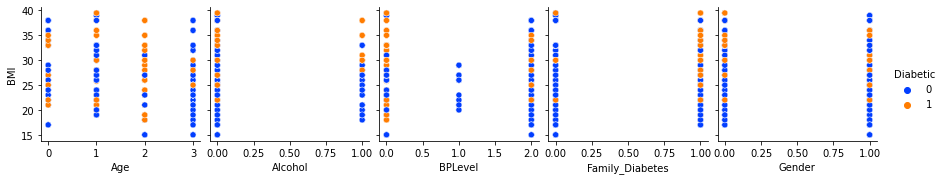

### BMI vs JunkFood, Pdiabetes, PhysicallyActive, Pregancies, RegularMedicine

### BMI vs Sleep, Smoking, SoundSleep, Stress, UriationFreq

### BMI vs highBP

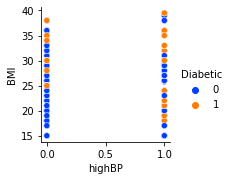

## BPLevel

### BPLevel vs Age, Alcohol, BMI, Family_Diabetes, Gender

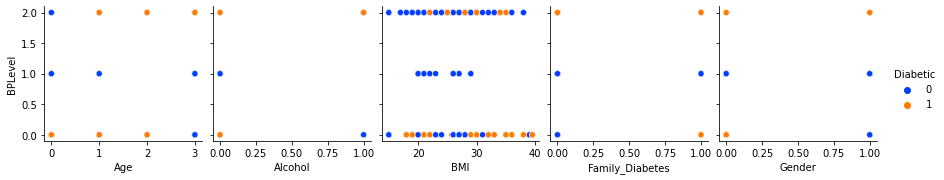

### BPLevel vs JunkFood, Pdiabetes, PhysicallyActive, Pregancies, RegularMedicine

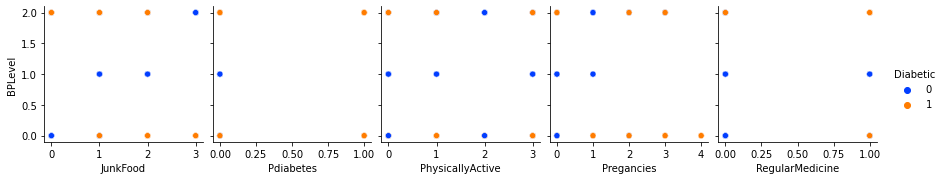

### BPLevel vs Sleep, Smoking, SoundSleep, Stress, UriationFreq

### BPLevel vs highBP

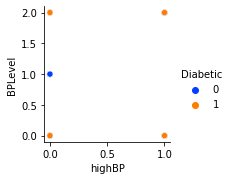

## Family_Diabetes

### Family_Diabetes vs Age, Alcohol, BMI, BPLevel, Gender

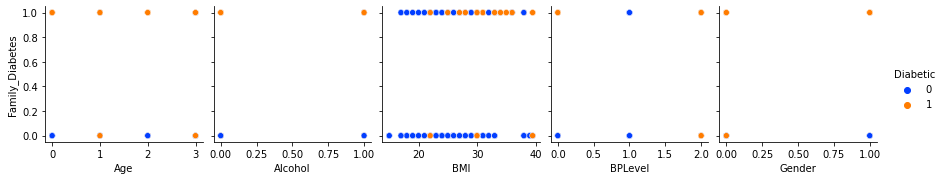

### Family_Diabetes vs JunkFood, Pdiabetes, PhysicallyActive, Pregancies, RegularMedicine

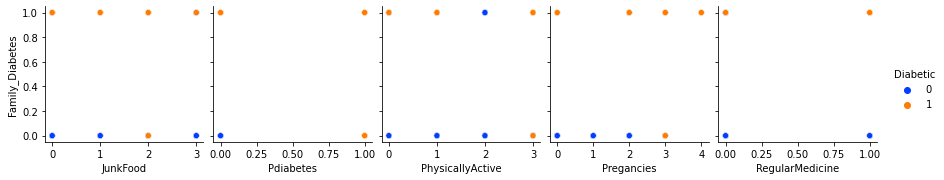

### Family_Diabetes vs Sleep, Smoking, SoundSleep, Stress, UriationFreq

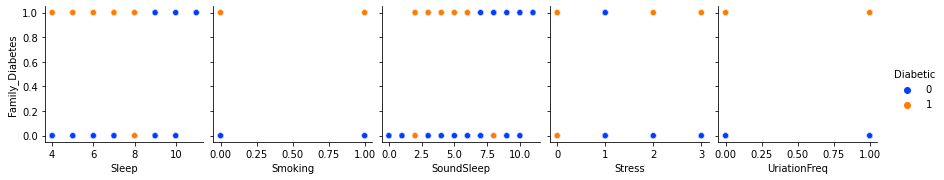

### Family_Diabetes vs highBP

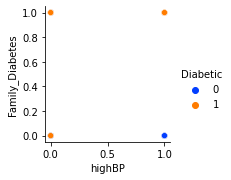

## Gender

### Gender vs Age, Alcohol, BMI, BPLevel, Family_Diabetes

### Gender vs JunkFood, Pdiabetes, PhysicallyActive, Pregancies, RegularMedicine

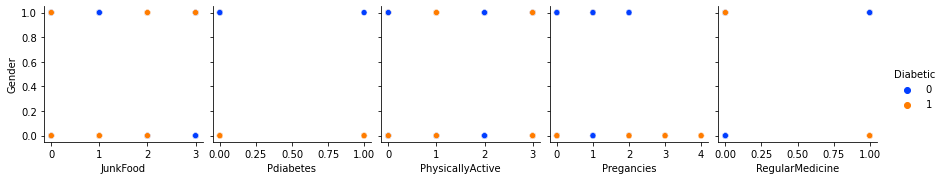

### Gender vs Sleep, Smoking, SoundSleep, Stress, UriationFreq

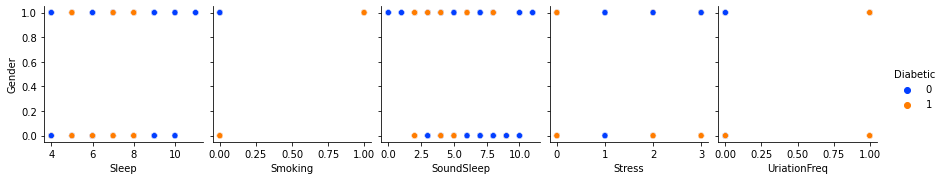

### Gender vs highBP

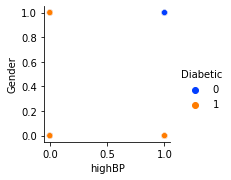

## JunkFood

### JunkFood vs Age, Alcohol, BMI, BPLevel, Family_Diabetes

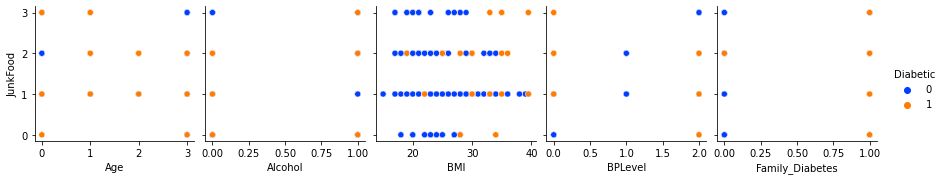

### JunkFood vs Gender, Pdiabetes, PhysicallyActive, Pregancies, RegularMedicine

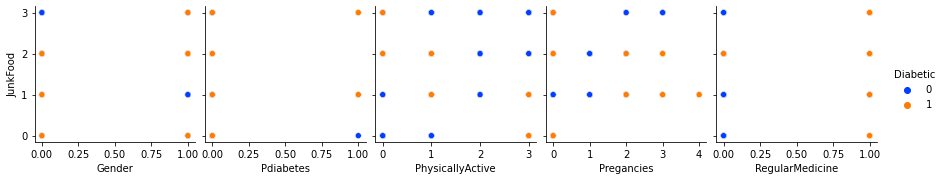

### JunkFood vs Sleep, Smoking, SoundSleep, Stress, UriationFreq

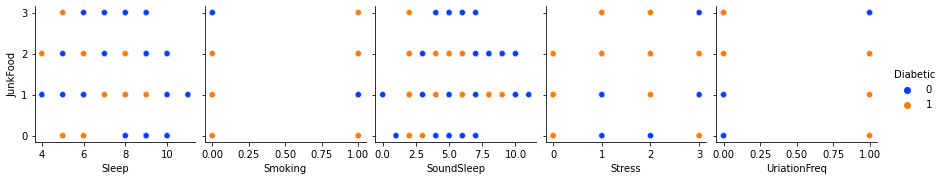

### JunkFood vs highBP

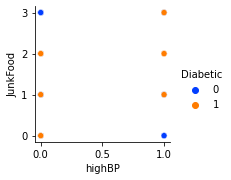

## Pdiabetes

### Pdiabetes vs Age, Alcohol, BMI, BPLevel, Family_Diabetes

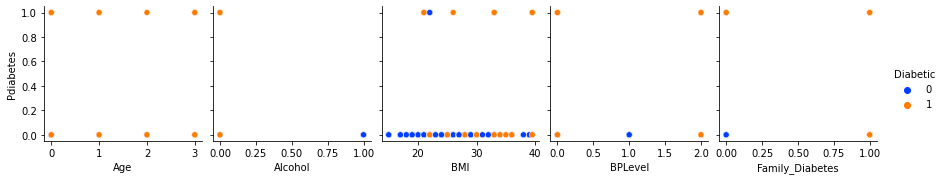

### Pdiabetes vs Gender, JunkFood, PhysicallyActive, Pregancies, RegularMedicine

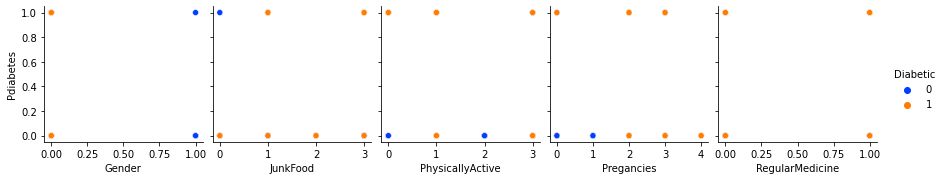

### Pdiabetes vs Sleep, Smoking, SoundSleep, Stress, UriationFreq

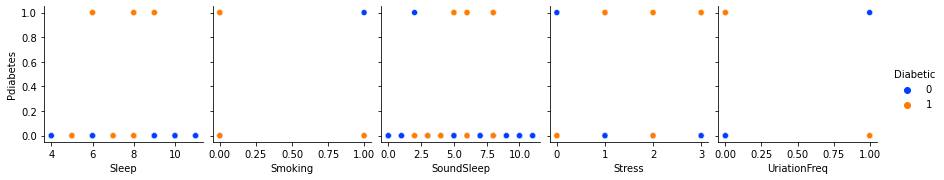

### Pdiabetes vs highBP

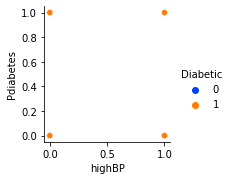

## PhysicallyActive

### PhysicallyActive vs Age, Alcohol, BMI, BPLevel, Family_Diabetes

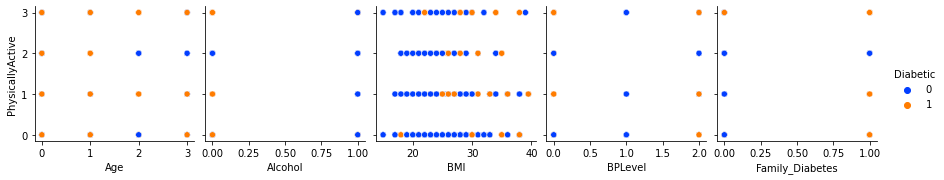

### PhysicallyActive vs Gender, JunkFood, Pdiabetes, Pregancies, RegularMedicine

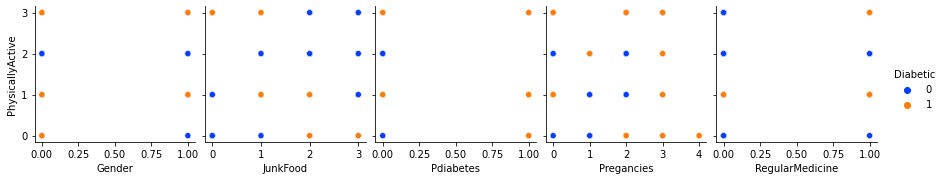

### PhysicallyActive vs Sleep, Smoking, SoundSleep, Stress, UriationFreq

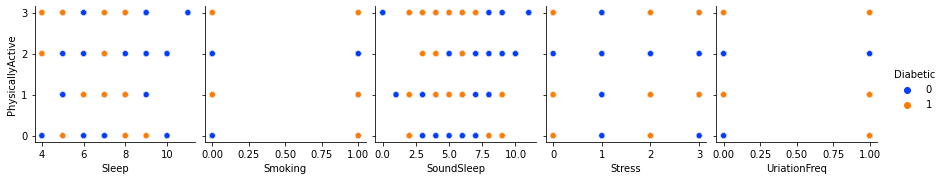

### PhysicallyActive vs highBP

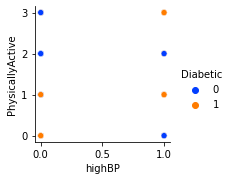

## Pregancies

### Pregancies vs Age, Alcohol, BMI, BPLevel, Family_Diabetes

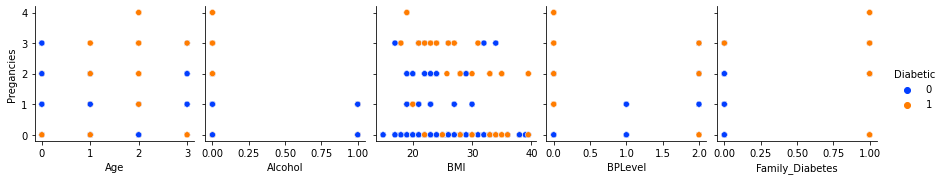

### Pregancies vs Gender, JunkFood, Pdiabetes, PhysicallyActive, RegularMedicine

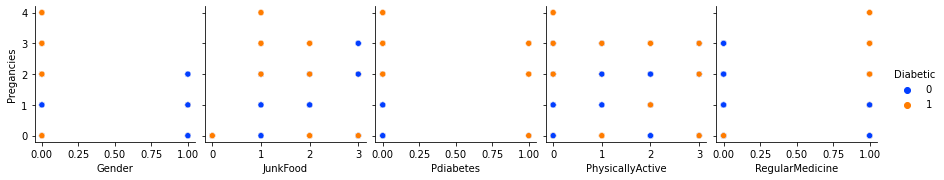

### Pregancies vs Sleep, Smoking, SoundSleep, Stress, UriationFreq

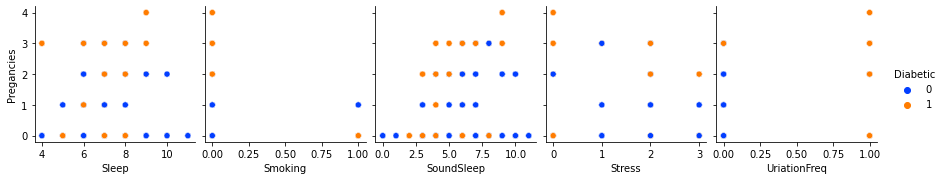

### Pregancies vs highBP

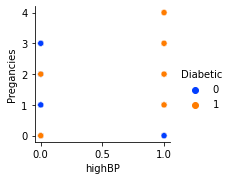

## RegularMedicine

### RegularMedicine vs Age, Alcohol, BMI, BPLevel, Family_Diabetes

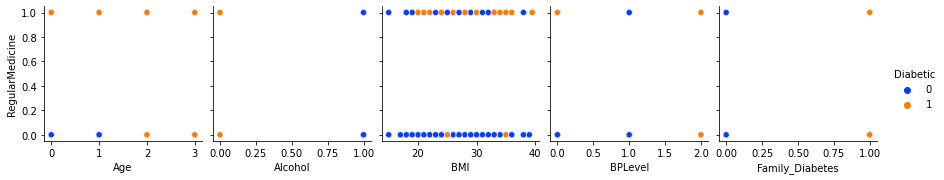

### RegularMedicine vs Gender, JunkFood, Pdiabetes, PhysicallyActive, Pregancies

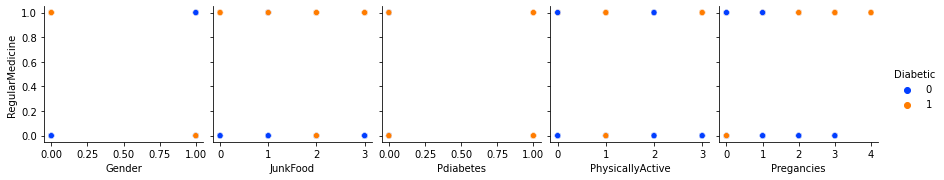

### RegularMedicine vs Sleep, Smoking, SoundSleep, Stress, UriationFreq

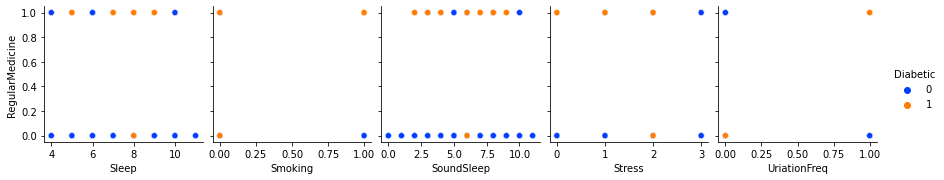

### RegularMedicine vs highBP

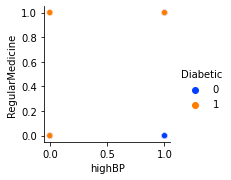

## Sleep

### Sleep vs Age, Alcohol, BMI, BPLevel, Family_Diabetes

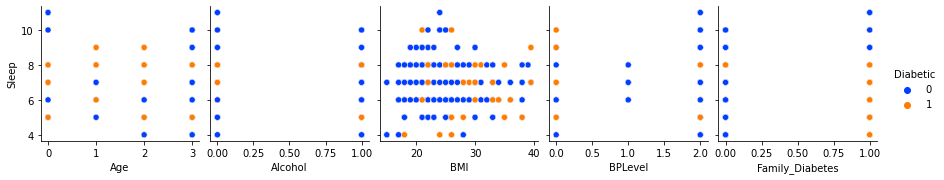

### Sleep vs Gender, JunkFood, Pdiabetes, PhysicallyActive, Pregancies

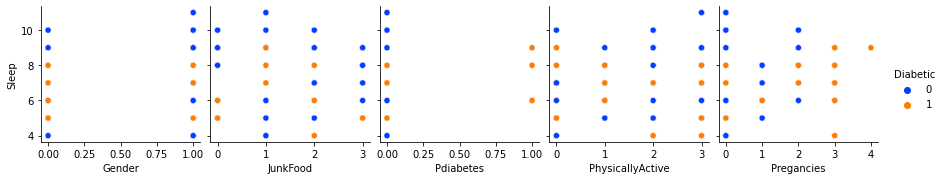

### Sleep vs RegularMedicine, Smoking, SoundSleep, Stress, UriationFreq

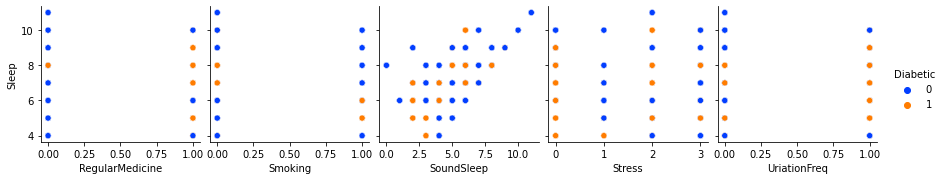

### Sleep vs highBP

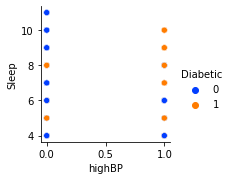

## Smoking

### Smoking vs Age, Alcohol, BMI, BPLevel, Family_Diabetes

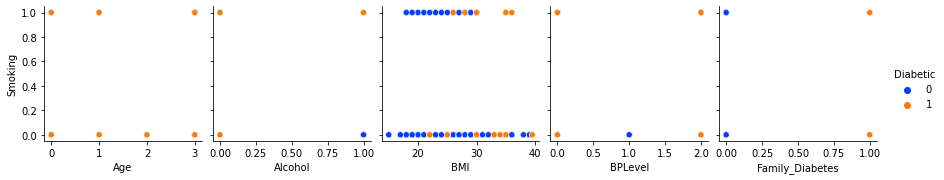

### Smoking vs Gender, JunkFood, Pdiabetes, PhysicallyActive, Pregancies

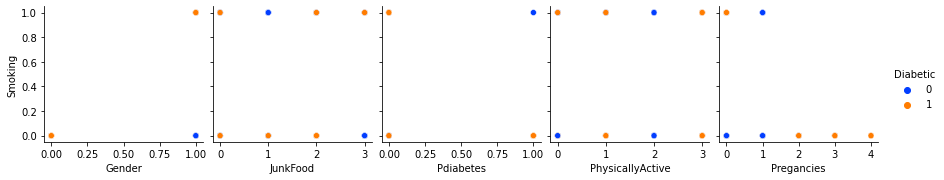

### Smoking vs RegularMedicine, Sleep, SoundSleep, Stress, UriationFreq

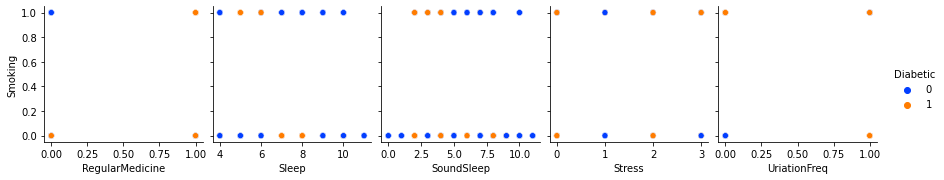

### Smoking vs highBP

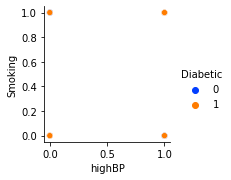

## SoundSleep

### SoundSleep vs Age, Alcohol, BMI, BPLevel, Family_Diabetes

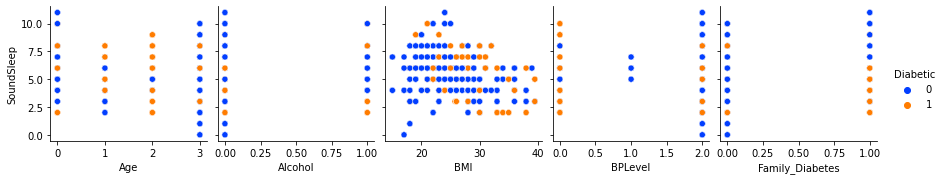

### SoundSleep vs Gender, JunkFood, Pdiabetes, PhysicallyActive, Pregancies

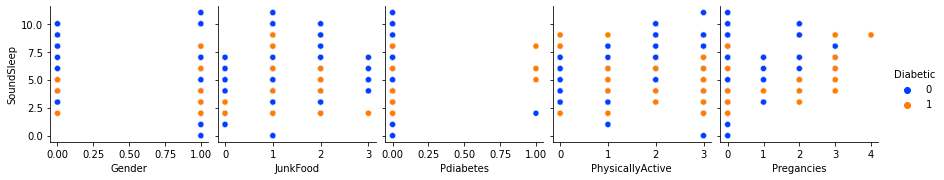

### SoundSleep vs RegularMedicine, Sleep, Smoking, Stress, UriationFreq

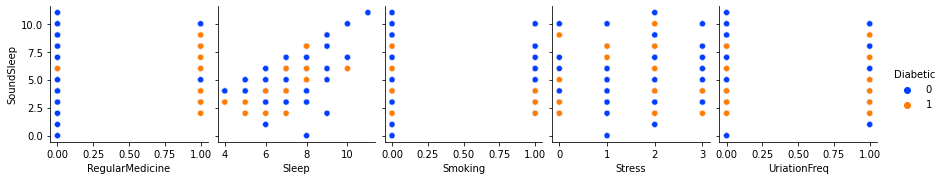

### SoundSleep vs highBP

## Stress

### Stress vs Age, Alcohol, BMI, BPLevel, Family_Diabetes

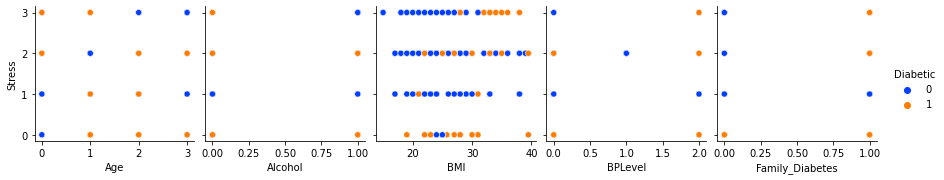

### Stress vs Gender, JunkFood, Pdiabetes, PhysicallyActive, Pregancies

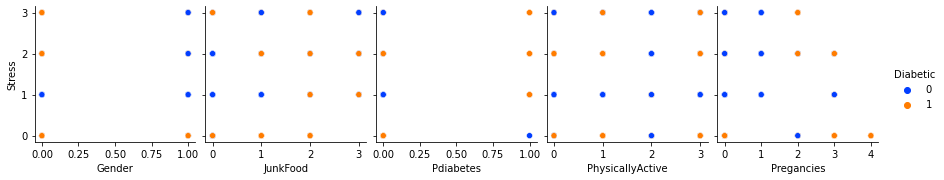

### Stress vs RegularMedicine, Sleep, Smoking, SoundSleep, UriationFreq

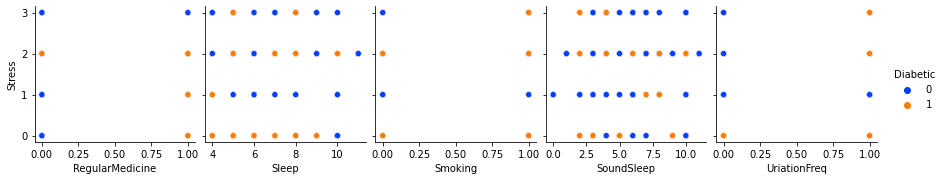

### Stress vs highBP

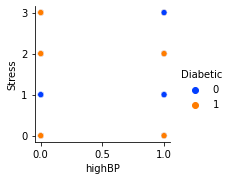

## UriationFreq

### UriationFreq vs Age, Alcohol, BMI, BPLevel, Family_Diabetes

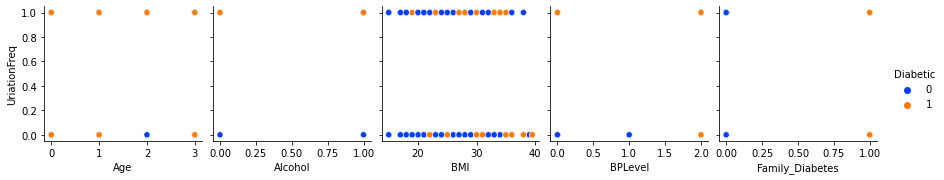

### UriationFreq vs Gender, JunkFood, Pdiabetes, PhysicallyActive, Pregancies

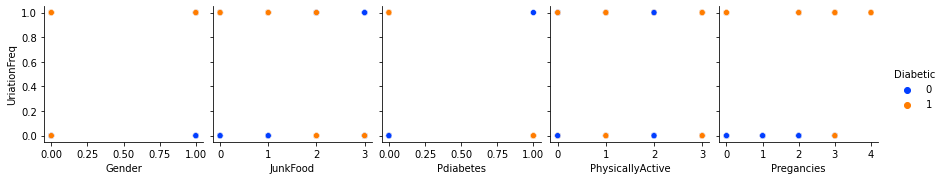

### UriationFreq vs RegularMedicine, Sleep, Smoking, SoundSleep, Stress

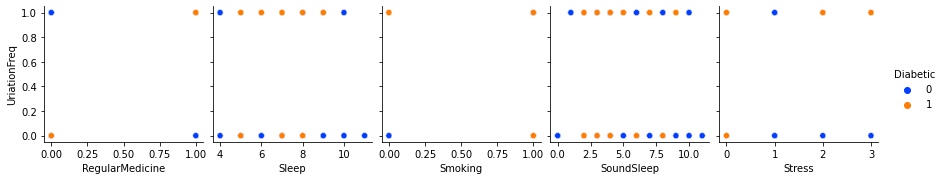

### UriationFreq vs highBP

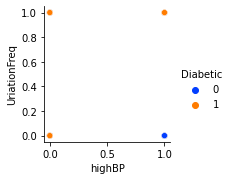

## highBP

### highBP vs Age, Alcohol, BMI, BPLevel, Family_Diabetes

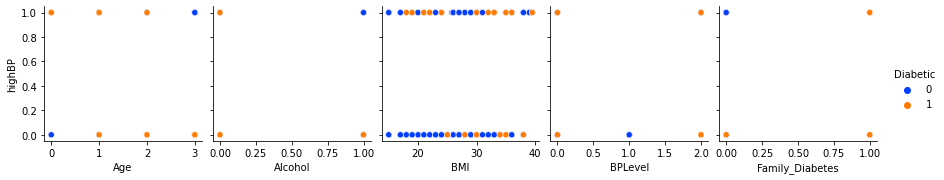

### highBP vs Gender, JunkFood, Pdiabetes, PhysicallyActive, Pregancies

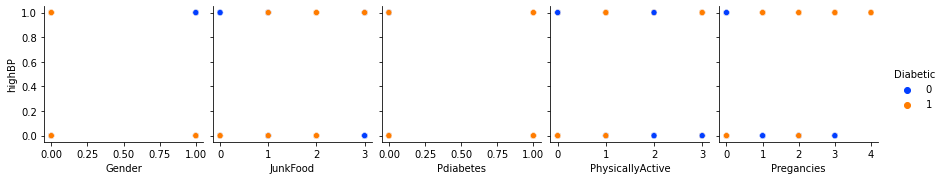

### highBP vs RegularMedicine, Sleep, Smoking, SoundSleep, Stress

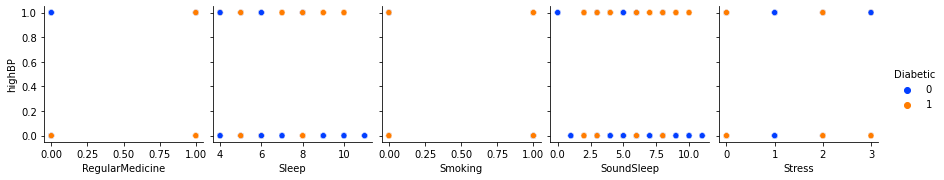

### highBP vs UriationFreq

In [68]:
from IPython.display import Markdown
import seaborn as sns
import matplotlib.pyplot as plt

# `df` already in scope as the pandas dataframe with data

hue = 'Diabetic'
vars_per_line = 5
all_vars = list(data.columns.symmetric_difference([hue]))

for var in all_vars:
    rest_vars = list(all_vars)
    rest_vars.remove(var)
    display(Markdown(f"## {var}"))
    while rest_vars:
        line_vars = rest_vars[:vars_per_line]
        del rest_vars[:vars_per_line]
        line_var_names = ", ".join(line_vars)
        display(Markdown(f"### {var} vs {line_var_names}"))
        sns.pairplot(data, x_vars=line_vars, y_vars=[var], hue=hue, palette='bright', )
        plt.show()
        plt.close()

#4. KNN


In [69]:
# Separate the feature columns (everything except churned) from the label (churned). This will create two tables.

# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'Diabetic']

# Split the data into two dataframes
X_data = data[x_cols]
y_data = data['Diabetic']

# # alternatively:
# X_data = data.copy()
# y_data = X_data.pop('churned')

X_data.head()

Age  Gender  Family_Diabetes  highBP  PhysicallyActive   BMI  Smoking  \
0    1       1                0       1                 3  39.0        0   
1    1       1                0       1                 0  28.0        0   
2    0       1                0       0                 3  24.0        0   
3    1       1                0       0                 3  23.0        0   
4    0       1                0       0                 0  27.0        0   

   Alcohol  Sleep  SoundSleep  RegularMedicine  JunkFood  Stress  BPLevel  \
0        0      8           6                0         1       2        0   
1        0      8           6                1         3       2        2   
2        0      6           6                0         1       2        2   
3        0      8           6                0         1       2        2   
4        0      8           8                0         1       2        2   

   Pregancies  Pdiabetes  UriationFreq  
0           0          0             0  
1           0          0             0  
2           0          0             0  
3           0          0             0  
4           0          0             0

In [70]:

# search for an optimal value of K for KNN


# empty list to store scores
k_scores = []

for k in range(1,11):
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_data, y_data, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append((k,scores.mean()))
    
score_df = pd.DataFrame(k_scores, columns=['k','accuracy'])
score_df

k  accuracy
0   1  0.951579
1   2  0.964211
2   3  0.963158
3   4  0.958947
4   5  0.955789
5   6  0.824211
6   7  0.796842
7   8  0.793684
8   9  0.804211
9  10  0.794737

In [71]:
# Now try to train the model using training data, and evaluate the performance of the model on the testing data


#train k-NN model on X_train and y_train, predict it on y_train,y_test using knn.score

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 11));

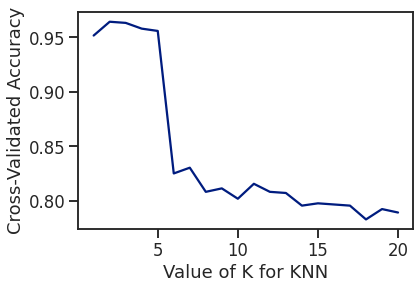

In [72]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 31
k_range = range(1, 21)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_data, y_data, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

As we can see the best K is between 2 to 5, after 5 the accuracy is starting to decrease because of underfitting. High values of k will make the underfitting.

Evaluation procedure 1 - Train and test on the entire dataset

In [73]:
# Fit a K-nearest neighbors model with a value of k=3 to this data and predict the outcome on the same data.

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

In [74]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [75]:
# print the accuracy

print(accuracy(y_data, y_pred))

0.9726315789473684


In [76]:
# Fit the K-nearest neighbors model again with n_neighbors=3 but this time use distance for the weights. 

# Calculate the accuracy using the function you created above.

knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

print(accuracy(y_data, y_pred))

0.9757894736842105


In [77]:
# Fit another K-nearest neighbors model. 

knn = KNeighborsClassifier(n_neighbors=3, p=1)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

print(accuracy(y_data, y_pred))

# This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (p=1) i.e. Manhattan Distance.

0.9736842105263158


Evaluation procedure 2 - Train/test split

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)



In [79]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

The data is imbalance so i use SMOTE to balance the data

In [80]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 211
Before OverSampling, counts of label '0': 549
After OverSampling, counts of label '1': 549
After OverSampling, counts of label '0': 549


In [81]:
knn = knn.fit(X_train_res, y_train_res)

#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.9578947368421052

Feature scaling

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_res2 = scaler.fit_transform(X_train_res)
X_test2 = scaler.fit_transform(X_test)

scaling of the data makes it easy for a model to learn and understand the problem

In [83]:
new_X_train_res= pd.DataFrame(scaler.fit_transform(X_train_res))
new_X_test = pd.DataFrame(scaler.fit_transform(X_test))

In [84]:
# Fit the K-nearest neighbors model with different values of k
# Store the accuracy measurement for each k

score_list = list()

for k in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn = knn.fit(X_train_res, y_train_res)
    
    y_pred = knn.predict(X_test)
    score = accuracy(y_test, y_pred)
    
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
score_df

k  accuracy
0    1  0.957895
1    2  0.963158
2    3  0.957895
3    4  0.957895
4    5  0.889474
5    6  0.884211
6    7  0.847368
7    8  0.836842
8    9  0.852632
9   10  0.857895
10  11  0.842105
11  12  0.868421
12  13  0.836842
13  14  0.836842
14  15  0.842105
15  16  0.852632
16  17  0.852632
17  18  0.863158
18  19  0.847368
19  20  0.842105

k = 3 has the best accuracy which is 96.8% so we are gonna use the k=3 to get the accuracy of train and test model

In [85]:
# Fit the K-nearest neighbors model again with n_neighbors=3 but this time use distance for the weights. 

# Calculate the accuracy using the function you created above.

knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn = knn.fit(X_train_res, y_train_res)

y_pred = knn.predict(X_test)

print(accuracy(y_test, y_pred))

0.9631578947368421


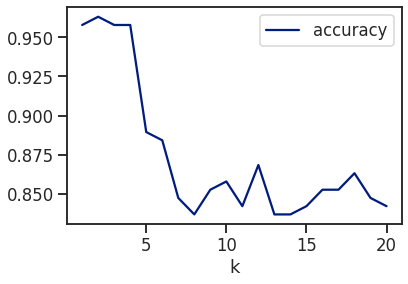

In [86]:
score_df.plot(x ='k', y='accuracy', kind = 'line')
plt.show()

In [87]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 4.1 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [88]:
# estimate the bias and variance for a regression model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp

model = KNeighborsClassifier(n_neighbors=3,p=1)
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, new_X_train_res.values, y_train_res.values, new_X_test.values, y_test.values, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.108
Bias: 0.049
Variance: 0.059


Average expected loss 0.07389473684210526
Average bias 0.05263157894736842
Average variance 0.043263157894736844
Average expected loss 0.07123684210526315
Average bias 0.04736842105263158
Average variance 0.047289473684210534
Average expected loss 0.10757894736842104
Average bias 0.042105263157894736
Average variance 0.08447368421052634
Average expected loss 0.10436842105263161
Average bias 0.04736842105263158
Average variance 0.08147368421052632
Average expected loss 0.1473157894736842
Average bias 0.11578947368421053
Average variance 0.10373684210526317
Average expected loss 0.14107894736842105
Average bias 0.11052631578947368
Average variance 0.09907894736842103
Average expected loss 0.17328947368421055
Average bias 0.1736842105263158
Average variance 0.0955
Average expected loss 0.16734210526315788
Average bias 0.18947368421052632
Average variance 0.09550000000000002
Average expected loss 0.19065789473684214
Average bias 0.18947368421052632
Average variance 0.0793421052631579
Avera

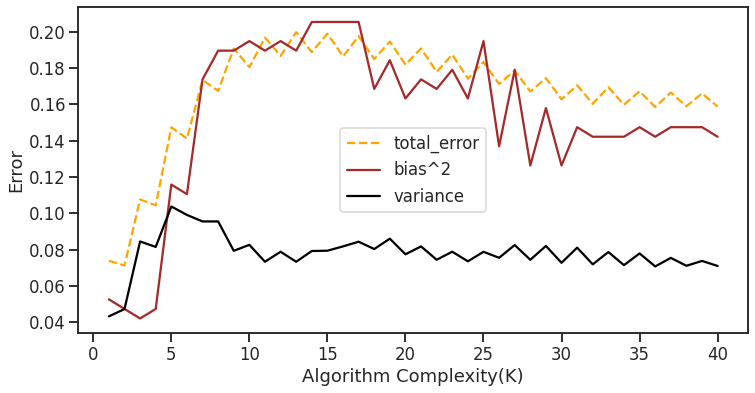

In [89]:

bias_KnnClass, var_KnnClass,error_KnnClass, = [], [], []
for k in range(1,41):
    clf_knn = KNeighborsClassifier(n_neighbors=k,p=1)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf_knn, new_X_train_res.values, y_train_res.values, new_X_test.values, y_test.values, loss='0-1_loss', random_seed=123)
    bias_KnnClass.append(avg_bias)
    var_KnnClass.append(avg_var)
    error_KnnClass.append(avg_expected_loss)
plt.figure(figsize=(12, 6))
plt.plot(range(1,41), error_KnnClass, 'orange', label = 'total_error',linestyle='dashed')
plt.plot(range(1,41), bias_KnnClass, 'brown', label = 'bias^2')
plt.plot(range(1,41), var_KnnClass, 'black', label = 'variance')
plt.xlabel('Algorithm Complexity(K)')
plt.ylabel('Error')
plt.legend()

In [90]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_res, y_train_res)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

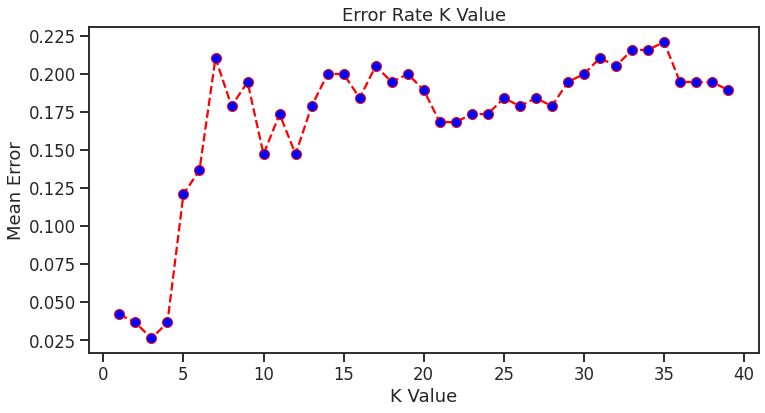

In [91]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the output, we can see that mean error is below 0.05 which is k=2,3,4

In [92]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_res2, y_train_res)
y_pred = knn.predict(X_test2)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0.8578947368421053
              precision    recall  f1-score   support

           0       0.96      0.84      0.89       135
           1       0.69      0.91      0.79        55

    accuracy                           0.86       190
   macro avg       0.83      0.87      0.84       190
weighted avg       0.88      0.86      0.86       190

[[113  22]
 [  5  50]]


I use the k = 5 to find the accuracy first. The accuracy of using neighbour= 5 is quite high which is 86%. The recall of no diabetic is 84% and diabetic is 91%. Seems the accuracy is consider as high. I will use hyperparameter tuning to find the best neighbour, metric and weights using gridsearch to improve the recall and accuracy

##4.1 Hyperparameter tuning

In [93]:
k_range = list(range(1, 31))

In [94]:
grid_params = { 'n_neighbors' : k_range,
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [95]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [96]:
# fit the model on our data set
g_res = gs.fit(X_data, y_data)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


In [97]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

The gridsearch shows that neighbour = 3, weight = distance and metric = manhattan will get the highest accuracy. 

##4.2 Oversampling

###4.2.1 Standard Scaler

In [98]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors =3, weights = 'distance',metric= 'manhattan')
knn.fit(X_train_res2, y_train_res)
y_pred = knn.predict(X_test2)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.9578947368421052
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       135
           1       0.90      0.96      0.93        55

    accuracy                           0.96       190
   macro avg       0.94      0.96      0.95       190
weighted avg       0.96      0.96      0.96       190

0.9595959595959597


In [99]:
clf = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(clf, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

The accuracy of k=3 is higher than the k=5. The accuracy has increased from 86% to 96%. The recall of no diabetic has increase from 84% to 96% and the recall of diabetic has increased from 91% to 96%. I will use the k=3 as the final result of knn because it can predict the diabetic and no diabetic with high accuracy and its also the best result after using hyperparameter tuning

The data that use Standard Scaler has a high accuracy. Now we gonna use another feature scaling to see the accuracy will increase or not

###4.2.2 MinMax Scaler

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
X_train_res3 = scaler2.fit_transform(X_train_res)
X_test3 = scaler2.fit_transform(X_test)

In [101]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors =3, weights = 'distance',metric= 'manhattan')
knn.fit(X_train_res3, y_train_res)
y_pred = knn.predict(X_test3)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       135
           1       0.96      0.95      0.95        55

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190

0.9653198653198652


In [102]:
clf = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(clf, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

The accuracy of using MinMax Scaler has a higher accuracy than the Standard Scaler so i will use KNN of MinMax Scaler as the result

In [103]:
    knn = KNeighborsClassifier(n_neighbors =3, weights = 'distance',metric= 'manhattan')
    knn.fit(X_train_res3, y_train_res)
    X_train_prediction = knn.predict(X_train_res3)
    X_test_prediction = knn.predict(X_test3)
    train_data_accuracy = accuracy_score(X_train_prediction, y_train_res)
    test_data_accuracy = accuracy_score(X_test_prediction, y_test)
    print('Accuracy of train data: ', train_data_accuracy)
    print('Accuracy of test data: ', test_data_accuracy)

Accuracy of train data:  0.982695810564663
Accuracy of test data:  0.9736842105263158


In [104]:

#ACCURACY ON TRAINING DATA


train_accuracy = []
test_accuracy = []
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors =k, weights = 'distance',metric= 'manhattan')
    knn.fit(X_train_res3, y_train_res)
    X_train_prediction = knn.predict(X_train_res3)
    X_test_prediction = knn.predict(X_test3)
    train_accuracy.append(accuracy_score(X_train_prediction, y_train_res))
    test_accuracy.append(accuracy_score(X_test_prediction, y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1,11), train_accuracy, 'orange', label = 'train accuracy',linestyle='dashed')
plt.plot(range(1,11), test_accuracy, 'brown', label = 'test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()

###4.2.3 Robust Scaling

In [105]:
scaler3 = RobustScaler()
X_train_res4 = scaler3.fit_transform(X_train_res)
X_test4 = scaler3.fit_transform(X_test)


In [106]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors =3, weights = 'distance',metric= 'manhattan')
knn.fit(X_train_res4, y_train_res)
y_pred = knn.predict(X_test4)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.9052631578947369
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       135
           1       0.78      0.93      0.85        55

    accuracy                           0.91       190
   macro avg       0.88      0.91      0.89       190
weighted avg       0.91      0.91      0.91       190

0.9117845117845117


In [107]:
clf = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(clf, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

##4.3 Undersampling

In [108]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train)

###4.3.1 Standard Scaler

In [109]:

X_train_miss2 = scaler.fit_transform(X_train_miss)
X_test2 = scaler.fit_transform(X_test)


knn = KNeighborsClassifier(n_neighbors =3, weights = 'distance',metric= 'manhattan')
knn.fit(X_train_miss, y_train_miss)
y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.8789473684210526
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       135
           1       0.74      0.91      0.81        55

    accuracy                           0.88       190
   macro avg       0.85      0.89      0.86       190
weighted avg       0.89      0.88      0.88       190



In [110]:
clf = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(clf, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

###4.3.2 MinMax Scaler

In [111]:
X_train_miss3 = scaler2.fit_transform(X_train_miss)
X_test3 = scaler2.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors =3, weights = 'distance',metric= 'manhattan')
knn.fit(X_train_miss3, y_train_miss)
y_pred = knn.predict(X_test3)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       135
           1       0.76      0.95      0.85        55

    accuracy                           0.90       190
   macro avg       0.87      0.91      0.89       190
weighted avg       0.91      0.90      0.90       190



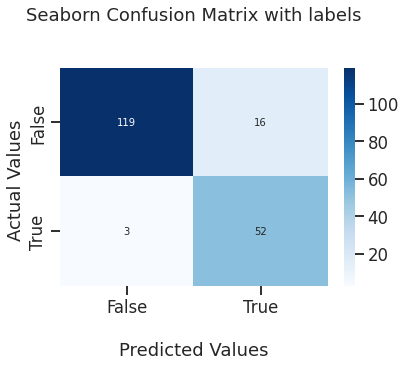

In [112]:
clf = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(clf, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

The accuracy of undersampling is 90% accuracy

###4.3.3 Robust Scaling

In [113]:
X_train_miss4 = scaler3.fit_transform(X_train_miss)
X_test4 = scaler3.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors =3, weights = 'distance',metric= 'manhattan')
knn.fit(X_train_miss4, y_train_miss)
y_pred = knn.predict(X_test4)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.6947368421052632
              precision    recall  f1-score   support

           0       0.94      0.61      0.74       135
           1       0.49      0.91      0.63        55

    accuracy                           0.69       190
   macro avg       0.71      0.76      0.69       190
weighted avg       0.81      0.69      0.71       190



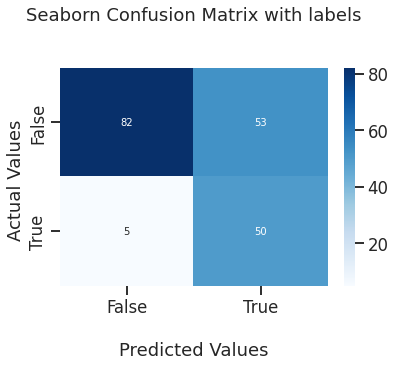

In [114]:
clf = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(clf, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Seems the accuracy of MinMax Scaler has higher than using Standard Scaler and Robust Scaling in Undersampling method. But the accuracy of using MinMax Scaler is lower than Oversampling using MinMax Scaler. So i will use Oversampling using MinMax Scaler

We can see that the accuracy of using undersampling is lower than the oversampling. We are not going to use the undersampling because we need high acuracy to predict the value. High accuracy means our result will more correct

##4.4 Cross Validation 

In [115]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors =3, weights = 'distance',metric= 'manhattan')

# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print(cross_val_score(knn, X_train_res3, y_train_res, cv=10, scoring='accuracy').mean())

0.9608840700583821


##4.5 ROC Curve

In [116]:
knn = KNeighborsClassifier(n_neighbors =3, weights = 'distance',metric= 'manhattan')
knn.fit(X_train_res3, y_train_res)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [117]:
#ROC is the receiver operating characteristic AUROC is the area under the ROC curve
r_probs = [0 for _ in range(len(y_test))]
##Get the probability of the prediction
knn_probs = knn.predict_proba(X_test3)
##Keep the positive outcome
knn_probs = knn_probs[:, 1]
r_auc = roc_auc_score(y_test, r_probs)
knn_auc = roc_auc_score(y_test, knn_probs)


In [118]:
print('KNN: AUROC = %.3f' % (knn_auc))

KNN: AUROC = 0.982


In [119]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

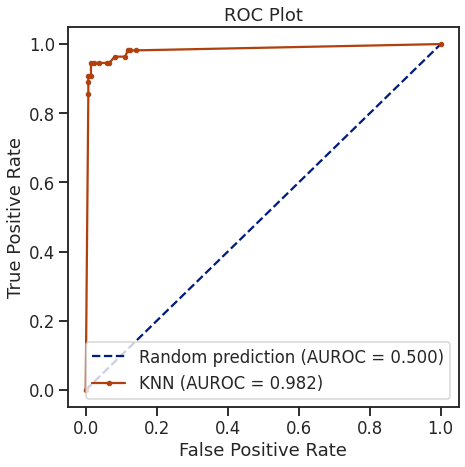

In [120]:
plt.figure(figsize=(7, 7))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show legend
plt.legend() # 
# Show plot
plt.show()


KNN has the performance of 98% and its is occupied the curve at the far left and top

#5. Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit

In [122]:
model_log = LogisticRegression()

In [123]:
model_log.fit(X_train_log,y_train_log)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [124]:
model_log.score(X_train_log,y_train_log)

0.869172932330827

In [125]:
model_log.score(X_test_log,y_test_log)

0.8491228070175438

Text(0.5, 0, 'Importance')

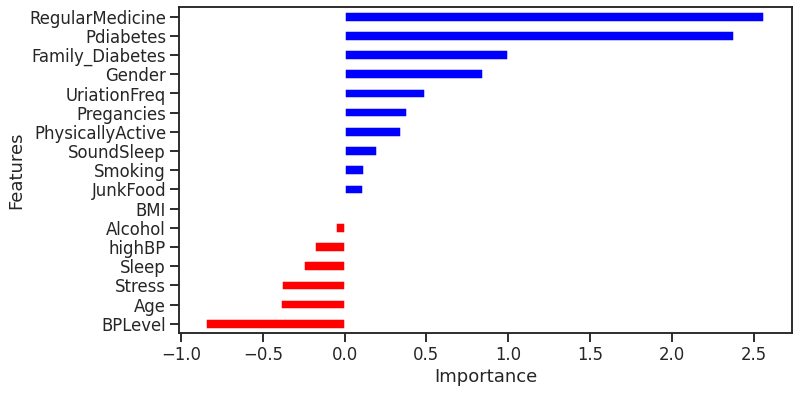

In [126]:
log_coeff = list(model_log.coef_[0])
log_labels = list(X_train.columns)
log_features = pd.DataFrame()
log_features['Features'] = log_labels
log_features['importance'] = log_coeff
log_features.sort_values(by=['importance'], ascending=True, inplace=True)
log_features['positive'] = log_features['importance'] > 0
log_features.set_index('Features', inplace=True)
log_features.importance.plot(kind='barh', figsize=(11, 6),color = log_features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

To get a better sense of what is going on inside the logistic regression model, we can visualize how our model uses the different features and which features have greater effect. From the above figure, we can know Regular Medine, Pdiabetes, Family Diabetes and gender have significant influence on the model.

BP is blood pressure has a negative influence on the prediction, i.e. higher blood pressure is correlated with a person not being diabetic.

In [127]:
log_y_pred = model_log.predict(X_test_log)

In [128]:
cnf_matrix = metrics.confusion_matrix(y_test_log, log_y_pred)

In [129]:
cnf_matrix

array([[180,  25],
       [ 18,  62]])

In [130]:
#confusion matrix
conf_mat = metrics.confusion_matrix(y_test_log, log_y_pred)
# plotting the confusion matrix
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [131]:
# ROC curve
log_y_pred_proba = model_log.predict_proba(X_test_log)[::,1]
log_fpr, log_tpr, _ = metrics.roc_curve(y_test_log, log_y_pred_proba)
log_auc = metrics.roc_auc_score(y_test_log, log_y_pred_proba)
plt.figure(figsize=(12, 7))
plt.plot(log_fpr, log_tpr, label="(LOG_R)auc = " + str(round(log_auc,2)))
plt.plot([0,1], [0,1], color = "red", linestyle = "--",
          label = "random")
plt.legend(loc=4)
plt.show()

The performance of this is quantified by the Area Under the Curve (AUC) which shows how close the model is to the ideal performance. The “best” AUC score for the ideal model would be 1 where our random model has an AUC of 0.5. We can thus see our model performs is 0.92.

In [132]:
lr_1 = LogisticRegression(max_iter=10000).fit(X_train_log, y_train_log) 
# l1 penalty
lr_l1_saga_1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='saga', max_iter=10000).fit(X_train_log, y_train_log)
# l2 penalty
lr_l2_lbfgs_1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear', max_iter=10000).fit(X_train_log, y_train_log)
lr_l2_sag_1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='sag', max_iter=10000).fit(X_train_log, y_train_log)
lr_l2_saga_1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='saga', max_iter=10000).fit(X_train_log, y_train_log)

In [133]:
print(lr_1.coef_)
print(lr_l1_saga_1.coef_)
print(lr_l2_lbfgs_1.coef_)
print(lr_l2_sag_1.coef_)
print(lr_l2_saga_1.coef_)

[[-0.37910631  0.93190201  0.98830743 -0.16255305  0.36534389  0.00935799
   0.15397239 -0.06235109 -0.21082297  0.19138589  2.6487081   0.14942832
  -0.35467325 -0.8377787   0.41045635  2.2421065   0.48556712]]
[[-0.38684891  1.08884865  1.11263279 -0.23559736  0.41341973  0.00593258
   0.08310825 -0.0729858  -0.22999511  0.19819616  2.92253734  0.14196273
  -0.35494013 -0.88438912  0.38488419  3.57982378  0.52576634]]
[[-4.01117259e-01  1.03148322e+00  1.07650275e+00 -2.65571274e-01
   3.91760021e-01  9.43584859e-04  1.46691759e-01 -1.07799291e-01
  -2.47743252e-01  1.97474943e-01  2.83297694e+00  1.48546595e-01
  -3.79913435e-01 -8.94859738e-01  3.89107832e-01  3.13846776e+00
   5.40558602e-01]]
[[-0.39007635  1.07359925  1.08317466 -0.24475382  0.39946114  0.00641446
   0.1491298  -0.10791031 -0.22619072  0.19993523  2.85180613  0.16339119
  -0.36189819 -0.88837562  0.40617557  3.08142654  0.54120919]]
[[-0.39104877  1.06436361  1.07810811 -0.24542078  0.39607637  0.00587367
   0.1

In [134]:
#PREDICT ALL CLASS MODEL
y_pred_1 = list()
y_prob_1 = list()

coeff_labels_1 = ['lr_1', 'lr_l1_saga_1', 'lr_l2_lbfgs_1', ' lr_l2_sag_1', 'lr_l2_saga_1']
coeff_models_1 = [lr_1, lr_l1_saga_1, lr_l2_lbfgs_1, lr_l2_sag_1, lr_l2_saga_1 ]

for lab,mod in zip(coeff_labels_1, coeff_models_1):
    y_pred_1.append(pd.Series(mod.predict(X_test_log), name=lab))
    y_prob_1.append(pd.Series(mod.predict_proba(X_test_log).max(axis=1), name=lab))
    
y_pred_1 = pd.concat(y_pred_1, axis=1)
y_prob_1 = pd.concat(y_prob_1, axis=1)

In [135]:
y_pred_1

lr_1  lr_l1_saga_1  lr_l2_lbfgs_1   lr_l2_sag_1  lr_l2_saga_1
0       0             0              0             0             0
1       0             0              0             0             0
2       0             0              0             0             0
3       0             0              0             0             0
4       0             0              0             0             0
..    ...           ...            ...           ...           ...
280     0             0              0             0             0
281     1             1              1             1             1
282     0             0              0             0             0
283     0             0              0             0             0
284     1             1              1             1             1

[285 rows x 5 columns]

In [136]:
y_prob_1

lr_1  lr_l1_saga_1  lr_l2_lbfgs_1   lr_l2_sag_1  lr_l2_saga_1
0    0.976797      0.980412       0.978704      0.979386      0.979216
1    0.814079      0.826241       0.826998      0.824706      0.824638
2    0.575096      0.560744       0.563702      0.560546      0.561244
3    0.949825      0.956136       0.952806      0.954670      0.954272
4    0.958052      0.965597       0.964154      0.964044      0.963839
..        ...           ...            ...           ...           ...
280  0.990955      0.993826       0.993762      0.993718      0.993664
281  0.658611      0.693289       0.710210      0.688188      0.689683
282  0.976141      0.982337       0.980839      0.980547      0.980420
283  0.947657      0.952491       0.947114      0.951641      0.951053
284  0.966418      0.964717       0.967391      0.967892      0.968177

[285 rows x 5 columns]

In [137]:
metrics1 = list()
cm1 = dict()

for lab in coeff_labels_1:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test_log, y_pred_1[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test_log, y_pred_1[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test_log, classes=[0,1]),
              label_binarize(y_pred_1[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm1[lab] = confusion_matrix(y_test_log, y_pred_1[lab])
    
    metrics1.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics1 = pd.concat(metrics1, axis=1)


In [138]:
metrics1

lr_1  lr_l1_saga_1  lr_l2_lbfgs_1   lr_l2_sag_1  lr_l2_saga_1
precision  0.862433      0.866697       0.858184      0.862433      0.862433
recall     0.856140      0.859649       0.852632      0.856140      0.856140
fscore     0.858357      0.862023       0.854674      0.858357      0.858357
accuracy   0.856140      0.859649       0.852632      0.856140      0.856140
auc        0.839024      0.845274       0.832774      0.839024      0.839024

In [139]:
print(lr_1.score(X_train_log,y_train_log))
print(lr_l1_saga_1.score(X_train_log,y_train_log))
print(lr_l2_lbfgs_1.score(X_train_log,y_train_log))
print(lr_l2_sag_1.score(X_train_log,y_train_log))
print(lr_l2_saga_1.score(X_train_log,y_train_log))

0.8721804511278195
0.8766917293233083
0.8736842105263158
0.8721804511278195
0.8721804511278195


In [140]:
print(lr_1.score(X_test_log,y_test_log))
print(lr_l1_saga_1.score(X_test_log,y_test_log))
print(lr_l2_lbfgs_1.score(X_test_log,y_test_log))
print(lr_l2_sag_1.score(X_test_log,y_test_log))
print(lr_l2_saga_1.score(X_test_log,y_test_log))

0.856140350877193
0.8596491228070176
0.8526315789473684
0.856140350877193
0.856140350877193


In [141]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels_1):
    sns.heatmap(cm1[lab], ax=ax, annot=True, fmt='d',cmap='Purples');
    ax.set(title=lab);
    
plt.tight_layout()


##5.1 Standard Scaler

In [142]:
data

Age  Gender  Family_Diabetes  highBP  PhysicallyActive   BMI  Smoking  \
0      1       1                0       1                 3  39.0        0   
1      1       1                0       1                 0  28.0        0   
2      0       1                0       0                 3  24.0        0   
3      1       1                0       0                 3  23.0        0   
4      0       1                0       0                 0  27.0        0   
..   ...     ...              ...     ...               ...   ...      ...   
947    3       1                1       0                 1  25.0        0   
948    2       1                1       1                 1  27.0        0   
949    2       1                0       1                 2  23.0        0   
950    2       1                0       1                 0  27.0        0   
951    2       0                1       1                 3  30.0        0   

     Alcohol  Sleep  SoundSleep  RegularMedicine  JunkFood  Stress  BPLevel  \
0          0      8           6                0         1       2        0   
1          0      8           6                1         3       2        2   
2          0      6           6                0         1       2        2   
3          0      8           6                0         1       2        2   
4          0      8           8                0         1       2        2   
..       ...    ...         ...              ...       ...     ...      ...   
947        0      8           6                0         2       2        2   
948        0      6           5                1         1       2        0   
949        0      6           5                1         1       2        0   
950        1      6           5                1         1       3        0   
951        0      7           4                1         1       2        0   

     Pregancies  Pdiabetes  UriationFreq  Diabetic  
0             0          0             0         0  
1             0          0             0         0  
2             0          0             0         0  
3             0          0             0         0  
4             0          0             0         0  
..          ...        ...           ...       ...  
947           0          0             0         1  
948           0          0             1         1  
949           0          0             0         0  
950           0          0             0         0  
951           2          0             1         1  

[950 rows x 18 columns]

In [143]:
x_data_logSTD = data[data.columns[:-1]]
x_data_logSTD

Age  Gender  Family_Diabetes  highBP  PhysicallyActive   BMI  Smoking  \
0      1       1                0       1                 3  39.0        0   
1      1       1                0       1                 0  28.0        0   
2      0       1                0       0                 3  24.0        0   
3      1       1                0       0                 3  23.0        0   
4      0       1                0       0                 0  27.0        0   
..   ...     ...              ...     ...               ...   ...      ...   
947    3       1                1       0                 1  25.0        0   
948    2       1                1       1                 1  27.0        0   
949    2       1                0       1                 2  23.0        0   
950    2       1                0       1                 0  27.0        0   
951    2       0                1       1                 3  30.0        0   

     Alcohol  Sleep  SoundSleep  RegularMedicine  JunkFood  Stress  BPLevel  \
0          0      8           6                0         1       2        0   
1          0      8           6                1         3       2        2   
2          0      6           6                0         1       2        2   
3          0      8           6                0         1       2        2   
4          0      8           8                0         1       2        2   
..       ...    ...         ...              ...       ...     ...      ...   
947        0      8           6                0         2       2        2   
948        0      6           5                1         1       2        0   
949        0      6           5                1         1       2        0   
950        1      6           5                1         1       3        0   
951        0      7           4                1         1       2        0   

     Pregancies  Pdiabetes  UriationFreq  
0             0          0             0  
1             0          0             0  
2             0          0             0  
3             0          0             0  
4             0          0             0  
..          ...        ...           ...  
947           0          0             0  
948           0          0             1  
949           0          0             0  
950           0          0             0  
951           2          0             1  

[950 rows x 17 columns]

In [144]:
stdScaler_LOG = StandardScaler()

In [145]:
x_data_logSTD = pd.DataFrame(stdScaler_LOG.fit_transform(x_data_logSTD), columns=x_data_logSTD.columns)

In [146]:
x_data_logSTD

Age    Gender  Family_Diabetes    highBP  PhysicallyActive  \
0   -0.857311  0.800475        -0.952696  1.779513          1.536169   
1   -0.857311  0.800475        -0.952696  1.779513         -1.066733   
2   -1.712821  0.800475        -0.952696 -0.561951          1.536169   
3   -0.857311  0.800475        -0.952696 -0.561951          1.536169   
4   -1.712821  0.800475        -0.952696 -0.561951         -1.066733   
..        ...       ...              ...       ...               ...   
945  0.853709  0.800475         1.049652 -0.561951         -0.199099   
946 -0.001801  0.800475         1.049652  1.779513         -0.199099   
947 -0.001801  0.800475        -0.952696  1.779513          0.668535   
948 -0.001801  0.800475        -0.952696  1.779513         -1.066733   
949 -0.001801 -1.249259         1.049652  1.779513          1.536169   

          BMI   Smoking   Alcohol     Sleep  SoundSleep  RegularMedicine  \
0    2.477973 -0.358142 -0.503287  0.824682    0.270707        -0.739751   
1    0.420168 -0.358142 -0.503287  0.824682    0.270707         1.351807   
2   -0.328125 -0.358142 -0.503287 -0.745354    0.270707        -0.739751   
3   -0.515198 -0.358142 -0.503287  0.824682    0.270707        -0.739751   
4    0.233095 -0.358142 -0.503287  0.824682    1.342257        -0.739751   
..        ...       ...       ...       ...         ...              ...   
945 -0.141051 -0.358142 -0.503287  0.824682    0.270707        -0.739751   
946  0.233095 -0.358142 -0.503287 -0.745354   -0.265068         1.351807   
947 -0.515198 -0.358142 -0.503287 -0.745354   -0.265068         1.351807   
948  0.233095 -0.358142  1.986937 -0.745354   -0.265068         1.351807   
949  0.794314 -0.358142 -0.503287  0.039664   -0.800842         1.351807   

     JunkFood    Stress   BPLevel  Pregancies  Pdiabetes  UriationFreq  
0   -0.409714  0.189087 -1.805935   -0.414924    -0.1223     -0.659580  
1    2.780685  0.189087  0.576896   -0.414924    -0.1223     -0.659580  
2   -0.409714  0.189087  0.576896   -0.414924    -0.1223     -0.659580  
3   -0.409714  0.189087  0.576896   -0.414924    -0.1223     -0.659580  
4   -0.409714  0.189087  0.576896   -0.414924    -0.1223     -0.659580  
..        ...       ...       ...         ...        ...           ...  
945  1.185485  0.189087  0.576896   -0.414924    -0.1223     -0.659580  
946 -0.409714  0.189087 -1.805935   -0.414924    -0.1223      1.516117  
947 -0.409714  0.189087 -1.805935   -0.414924    -0.1223     -0.659580  
948 -0.409714  1.419451 -1.805935   -0.414924    -0.1223     -0.659580  
949 -0.409714  0.189087 -1.805935    1.824721    -0.1223      1.516117  

[950 rows x 17 columns]

In [147]:
y_data_logSTD = data.Diabetic

In [148]:
# Get the split indexes
STD_strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)

for train,test in STD_strat_shuf_split.split(x_data_logSTD,y_data_logSTD):     #this will splits the index
    X_train_STAD = x_data_logSTD.iloc[train]
    y_train_STAD = y_data_logSTD.iloc[train]
    X_test_STAD = x_data_logSTD.iloc[test]
    y_test_STAD = y_data_logSTD.iloc[test]

In [149]:
# Standard logistic regression
lr_2 = LogisticRegression(max_iter=10000).fit(X_train_STAD, y_train_STAD) 
# l1 penalty
lr_l1_saga_2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='saga', max_iter=10000).fit(X_train_STAD, y_train_STAD)
# l2 penalty
lr_l2_lbfgs_2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear', max_iter=10000).fit(X_train_STAD, y_train_STAD)
lr_l2_sag_2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='sag', max_iter=10000).fit(X_train_STAD, y_train_STAD)
lr_l2_saga_2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='saga', max_iter=10000).fit(X_train_STAD, y_train_STAD)

In [150]:
# Predict the class and the probability for each

y_pred_2 = list()
y_prob_2 = list()

coeff_labels_2 = ['lr_2', 'lr_l1_saga_2', 'lr_l2_lbfgs_2', ' lr_l2_sag_2', 'lr_l2_saga_2']
coeff_models_2 = [lr_2, lr_l1_saga_2, lr_l2_lbfgs_2, lr_l2_sag_2, lr_l2_saga_2 ]

for lab,mod in zip(coeff_labels_2, coeff_models_2):
    y_pred_2.append(pd.Series(mod.predict(X_test_STAD), name=lab))
    y_prob_2.append(pd.Series(mod.predict_proba(X_test_STAD).max(axis=1), name=lab))
    
y_pred_2 = pd.concat(y_pred_2, axis=1)
y_prob_2 = pd.concat(y_prob_2, axis=1)

In [151]:
metrics_2 = list()
cm_2 = dict()

for lab in coeff_labels_2:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test_STAD, y_pred_2[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test_STAD, y_pred_2[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test_STAD, classes=[0,1]),
              label_binarize(y_pred_2[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm_2[lab] = confusion_matrix(y_test_STAD, y_pred_2[lab])
    
    metrics_2.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics_2 = pd.concat(metrics_2, axis=1)
print(metrics_2)

               lr_2  lr_l1_saga_2  lr_l2_lbfgs_2   lr_l2_sag_2  lr_l2_saga_2
precision  0.875315      0.873684       0.875315      0.872398      0.872398
recall     0.873684      0.873684       0.873684      0.873684      0.873684
fscore     0.874389      0.873684       0.874389      0.872927      0.872927
accuracy   0.873684      0.873684       0.873684      0.873684      0.873684
auc        0.848781      0.842997       0.848781      0.837213      0.837213


In [152]:
metrics_2

lr_2  lr_l1_saga_2  lr_l2_lbfgs_2   lr_l2_sag_2  lr_l2_saga_2
precision  0.875315      0.873684       0.875315      0.872398      0.872398
recall     0.873684      0.873684       0.873684      0.873684      0.873684
fscore     0.874389      0.873684       0.874389      0.872927      0.872927
accuracy   0.873684      0.873684       0.873684      0.873684      0.873684
auc        0.848781      0.842997       0.848781      0.837213      0.837213

In [153]:
print(lr_2.score(X_train_STAD,y_train_STAD))
print(lr_l1_saga_2.score(X_train_STAD,y_train_STAD))
print(lr_l2_lbfgs_2.score(X_train_STAD,y_train_STAD))
print(lr_l2_sag_2.score(X_train_STAD,y_train_STAD))
print(lr_l2_saga_2.score(X_train_STAD,y_train_STAD))

0.8776315789473684
0.875
0.8776315789473684
0.8736842105263158
0.8736842105263158


In [154]:
print(lr_2.score(X_test_STAD,y_test_STAD))
print(lr_l1_saga_2.score(X_test_STAD,y_test_STAD))
print(lr_l2_lbfgs_2.score(X_test_STAD,y_test_STAD))
print(lr_l2_sag_2.score(X_test_STAD,y_test_STAD))
print(lr_l2_saga_2.score(X_test_STAD,y_test_STAD))

0.8736842105263158
0.8736842105263158
0.8736842105263158
0.8736842105263158
0.8736842105263158


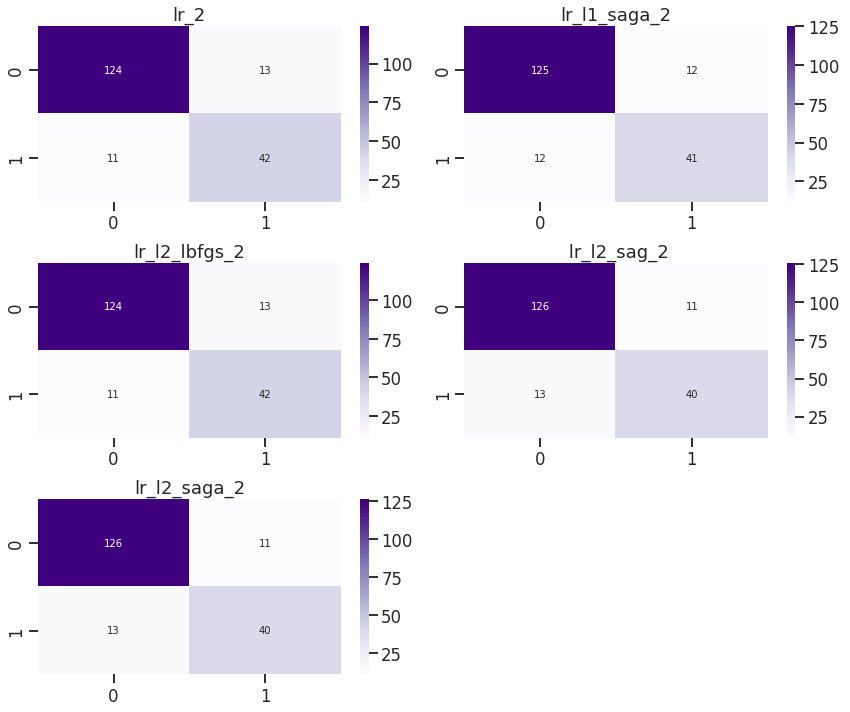

In [155]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels_2):
    sns.heatmap(cm_2[lab], ax=ax, annot=True, fmt='d',cmap='Purples');
    ax.set(title=lab);
    
plt.tight_layout()


##5.2 MinMax Scaler

In [156]:
x_data_MM = data[data.columns[:-1]]

In [157]:
minmaxScaler_log = MinMaxScaler()
x_data_MM = pd.DataFrame(minmaxScaler_log.fit_transform(x_data_MM), columns=x_data_MM.columns)

In [158]:
x_data_MM

Age  Gender  Family_Diabetes  highBP  PhysicallyActive       BMI  \
0    0.333333     1.0              0.0     1.0          1.000000  0.979592   
1    0.333333     1.0              0.0     1.0          0.000000  0.530612   
2    0.000000     1.0              0.0     0.0          1.000000  0.367347   
3    0.333333     1.0              0.0     0.0          1.000000  0.326531   
4    0.000000     1.0              0.0     0.0          0.000000  0.489796   
..        ...     ...              ...     ...               ...       ...   
945  1.000000     1.0              1.0     0.0          0.333333  0.408163   
946  0.666667     1.0              1.0     1.0          0.333333  0.489796   
947  0.666667     1.0              0.0     1.0          0.666667  0.326531   
948  0.666667     1.0              0.0     1.0          0.000000  0.489796   
949  0.666667     0.0              1.0     1.0          1.000000  0.612245   

     Smoking  Alcohol     Sleep  SoundSleep  RegularMedicine  JunkFood  \
0        0.0      0.0  0.571429    0.545455              0.0  0.333333   
1        0.0      0.0  0.571429    0.545455              1.0  1.000000   
2        0.0      0.0  0.285714    0.545455              0.0  0.333333   
3        0.0      0.0  0.571429    0.545455              0.0  0.333333   
4        0.0      0.0  0.571429    0.727273              0.0  0.333333   
..       ...      ...       ...         ...              ...       ...   
945      0.0      0.0  0.571429    0.545455              0.0  0.666667   
946      0.0      0.0  0.285714    0.454545              1.0  0.333333   
947      0.0      0.0  0.285714    0.454545              1.0  0.333333   
948      0.0      1.0  0.285714    0.454545              1.0  0.333333   
949      0.0      0.0  0.428571    0.363636              1.0  0.333333   

       Stress  BPLevel  Pregancies  Pdiabetes  UriationFreq  
0    0.666667      0.0         0.0        0.0           0.0  
1    0.666667      1.0         0.0        0.0           0.0  
2    0.666667      1.0         0.0        0.0           0.0  
3    0.666667      1.0         0.0        0.0           0.0  
4    0.666667      1.0         0.0        0.0           0.0  
..        ...      ...         ...        ...           ...  
945  0.666667      1.0         0.0        0.0           0.0  
946  0.666667      0.0         0.0        0.0           1.0  
947  0.666667      0.0         0.0        0.0           0.0  
948  1.000000      0.0         0.0        0.0           0.0  
949  0.666667      0.0         0.5        0.0           1.0  

[950 rows x 17 columns]

In [159]:
y_MM = data.Diabetic

In [160]:
# Get the split indexes
MM_strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)

for train,test in MM_strat_shuf_split.split(x_data_MM,y_MM):     #this will splits the index
    X_train_MM = x_data_MM.iloc[train]
    y_train_MM = y_MM.iloc[train]
    X_test_MM = x_data_MM.iloc[test]
    y_test_MM = y_MM.iloc[test]

In [161]:
# MINMAX logistic regression
lr_3 = LogisticRegression(max_iter=10000).fit(X_train_MM, y_train_MM) 
# l1 penalty
lr_l1_saga_3 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='saga', max_iter=10000).fit(X_train_MM, y_train_MM)
# l2 penalty
lr_l2_lbfgs_3 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear', max_iter=10000).fit(X_train_MM, y_train_MM)
lr_l2_sag_3 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='sag', max_iter=10000).fit(X_train_MM, y_train_MM)
lr_l2_saga_3 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='saga', max_iter=10000).fit(X_train_MM, y_train_MM)

In [162]:
# Predict the class and the probability for each

y_pred_3 = list()
y_prob_3 = list()

coeff_labels_3= ['lr_3', 'lr_l1_saga_3', 'lr_l2_lbfgs_3', ' lr_l2_sag_3', 'lr_l2_saga_3']
coeff_models_3 = [lr_3, lr_l1_saga_3, lr_l2_lbfgs_3, lr_l2_sag_3, lr_l2_saga_3 ]

for lab,mod in zip(coeff_labels_3, coeff_models_3):
    y_pred_3.append(pd.Series(mod.predict(X_test_MM), name=lab))
    y_prob_3.append(pd.Series(mod.predict_proba(X_test_MM).max(axis=1), name=lab))
    
y_pred_3 = pd.concat(y_pred_3, axis=1)
y_prob_3 = pd.concat(y_prob_3, axis=1)

In [163]:
metrics_3 = list()
cm_3 = dict()

for lab in coeff_labels_3:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test_MM, y_pred_3[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test_MM, y_pred_3[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test_MM, classes=[0,1]),
              label_binarize(y_pred_3[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm_3[lab] = confusion_matrix(y_test_MM, y_pred_3[lab])
    
    metrics_3.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics_3 = pd.concat(metrics_3, axis=1)
print(metrics_3)

               lr_3  lr_l1_saga_3  lr_l2_lbfgs_3   lr_l2_sag_3  lr_l2_saga_3
precision  0.873684      0.869224       0.871072      0.857113      0.857113
recall     0.873684      0.868421       0.868421      0.857895      0.857895
fscore     0.873684      0.868795       0.869503      0.857476      0.857476
accuracy   0.873684      0.868421       0.868421      0.857895      0.857895
auc        0.842997      0.839347       0.845132      0.820479      0.820479


In [164]:
metrics_3

lr_3  lr_l1_saga_3  lr_l2_lbfgs_3   lr_l2_sag_3  lr_l2_saga_3
precision  0.873684      0.869224       0.871072      0.857113      0.857113
recall     0.873684      0.868421       0.868421      0.857895      0.857895
fscore     0.873684      0.868795       0.869503      0.857476      0.857476
accuracy   0.873684      0.868421       0.868421      0.857895      0.857895
auc        0.842997      0.839347       0.845132      0.820479      0.820479

In [165]:
print(lr_3.score(X_train_MM,y_train_MM))
print(lr_l1_saga_3.score(X_train_MM,y_train_MM))
print(lr_l2_lbfgs_3.score(X_train_MM,y_train_MM))
print(lr_l2_sag_3.score(X_train_MM,y_train_MM))
print(lr_l2_saga_3.score(X_train_MM,y_train_MM))

0.8776315789473684
0.8723684210526316
0.8723684210526316
0.8710526315789474
0.8710526315789474


In [166]:
print(lr_3.score(X_test_MM,y_test_MM))
print(lr_l1_saga_3.score(X_test_MM,y_test_MM))
print(lr_l2_lbfgs_3.score(X_test_MM,y_test_MM))
print(lr_l2_sag_3.score(X_test_MM,y_test_MM))
print(lr_l2_saga_3.score(X_test_MM,y_test_MM))

0.8736842105263158
0.868421052631579
0.868421052631579
0.8578947368421053
0.8578947368421053


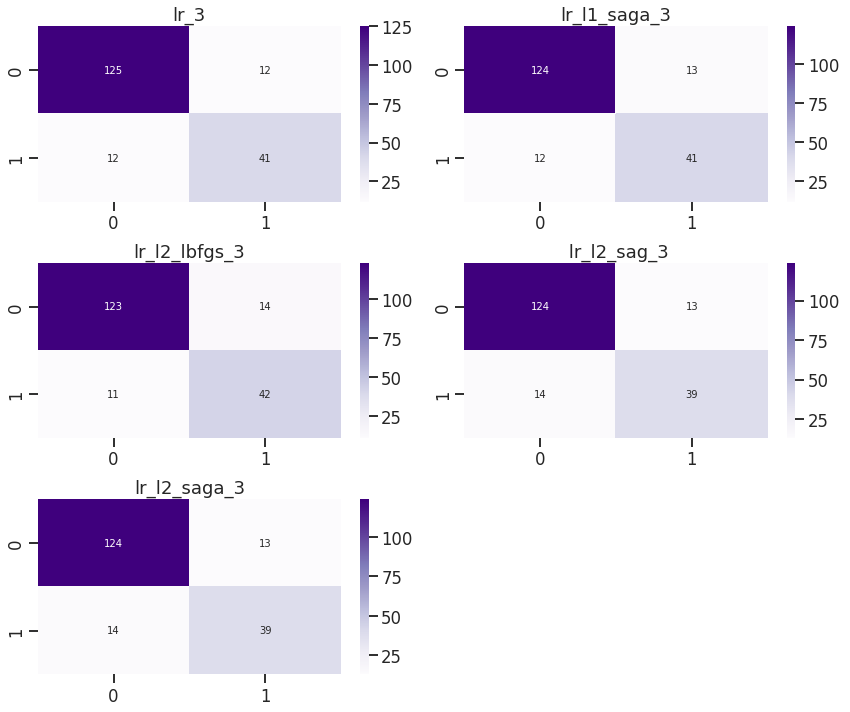

In [167]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels_3):
    sns.heatmap(cm_3[lab], ax=ax, annot=True, fmt='d',cmap='Purples');
    ax.set(title=lab);
    
plt.tight_layout()


In [168]:
metrics1 #ORi

lr_1  lr_l1_saga_1  lr_l2_lbfgs_1   lr_l2_sag_1  lr_l2_saga_1
precision  0.862433      0.866697       0.858184      0.862433      0.862433
recall     0.856140      0.859649       0.852632      0.856140      0.856140
fscore     0.858357      0.862023       0.854674      0.858357      0.858357
accuracy   0.856140      0.859649       0.852632      0.856140      0.856140
auc        0.839024      0.845274       0.832774      0.839024      0.839024

In [169]:
metrics_2 #STANDARD

lr_2  lr_l1_saga_2  lr_l2_lbfgs_2   lr_l2_sag_2  lr_l2_saga_2
precision  0.875315      0.873684       0.875315      0.872398      0.872398
recall     0.873684      0.873684       0.873684      0.873684      0.873684
fscore     0.874389      0.873684       0.874389      0.872927      0.872927
accuracy   0.873684      0.873684       0.873684      0.873684      0.873684
auc        0.848781      0.842997       0.848781      0.837213      0.837213

In [170]:
metrics_3 #MIN MAX

lr_3  lr_l1_saga_3  lr_l2_lbfgs_3   lr_l2_sag_3  lr_l2_saga_3
precision  0.873684      0.869224       0.871072      0.857113      0.857113
recall     0.873684      0.868421       0.868421      0.857895      0.857895
fscore     0.873684      0.868795       0.869503      0.857476      0.857476
accuracy   0.873684      0.868421       0.868421      0.857895      0.857895
auc        0.842997      0.839347       0.845132      0.820479      0.820479

BASED THE REULT, STANDARDSCALER is the best

##5.3 ROC Curve

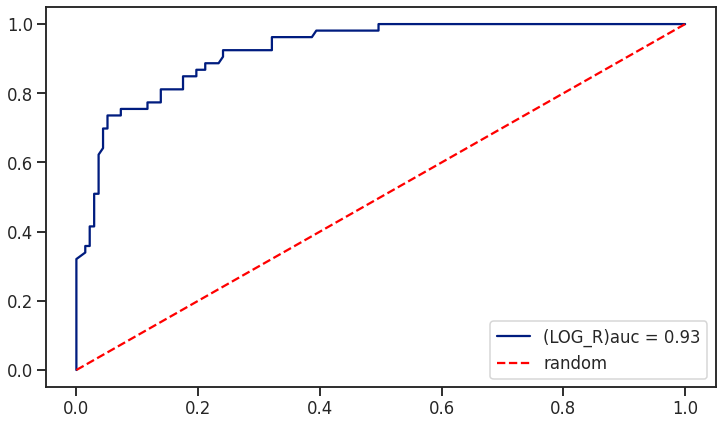

In [171]:
# ROC curve
log_y_pred_proba = model_log.predict_proba(X_test_STAD)[::,1]
log_fpr, log_tpr, _ = metrics.roc_curve(y_test_STAD, log_y_pred_proba)
log_auc = metrics.roc_auc_score(y_test_STAD, log_y_pred_proba)
plt.figure(figsize=(12, 7))
plt.plot(log_fpr, log_tpr, label="(LOG_R)auc = " + str(round(log_auc,2)))
plt.plot([0,1], [0,1], color = "red", linestyle = "--",
          label = "random")
plt.legend(loc=4)
plt.show()

The performance of this is quantified by the Area Under the Curve (AUC) which shows how close the model is to the ideal performance. The “best” AUC score for the ideal model would be 1 where our random model has an AUC of 0.5. We can thus see our model performs is 0.93.

##5.4 Hyperparameter Tuning

In [172]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [173]:
clf = GridSearchCV(lr_2, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [174]:
best_clf = clf.fit(X_train_STAD,y_train_STAD)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: 

In [175]:
best_clf.best_estimator_

LogisticRegression(C=0.03359818286283781)

In [176]:
print (f'Accuracy - : {best_clf.score(X_test_STAD,y_test_STAD):.3f}')

Accuracy - : 0.874


# 6. Decision Tree


In [177]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_dt,y_train_dt)

#Predict the response for train and test dataset
y_train_pred_dtWithoutOptimizing = clf.predict(X_train_dt)
y_test_pred_dtWithoutOptimizing = clf.predict(X_test_dt)

In [178]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=['Not diabetes','Diabetes']
               ,xticklabels=['Not diabetes','Diabetes'],cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train Confusion matrix


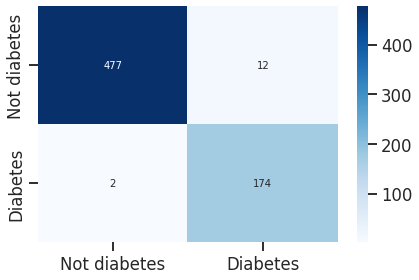

Accuracy:  0.9789473684210527
Classification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       479
           1       0.99      0.94      0.96       186

    accuracy                           0.98       665
   macro avg       0.98      0.97      0.97       665
weighted avg       0.98      0.98      0.98       665

ROC AUC score: 0.9656542528116372


In [179]:
# Training Accuracy, how often the model classify the training data correctly?
plot_confusionmatrix(y_train_pred_dtWithoutOptimizing,y_train_dt,dom='Train')
print("Accuracy: ", accuracy_score(y_train_dt, y_train_pred_dtWithoutOptimizing))
print("Classification report: ")
print(classification_report(y_train_dt, y_train_pred_dtWithoutOptimizing ))
print("ROC AUC score:", roc_auc_score(y_train_dt, y_train_pred_dtWithoutOptimizing))

Test Confusion matrix


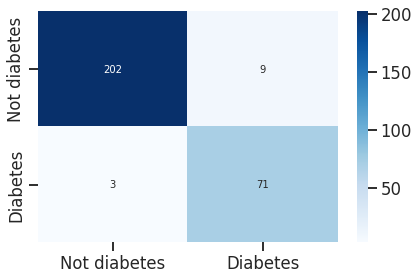

Accuracy:  0.9578947368421052
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       205
           1       0.96      0.89      0.92        80

    accuracy                           0.96       285
   macro avg       0.96      0.94      0.95       285
weighted avg       0.96      0.96      0.96       285

ROC AUC score: 0.9364329268292683


In [180]:
# Testing Accuracy, how often the model classify the testing data correctly?
plot_confusionmatrix(y_test_pred_dtWithoutOptimizing,y_test_dt,dom='Test')
print("Accuracy: ", accuracy_score(y_test_dt, y_test_pred_dtWithoutOptimizing))
print("Classification report: ")
print(classification_report(y_test_dt, y_test_pred_dtWithoutOptimizing ))
print("ROC AUC score:", roc_auc_score(y_test_dt, y_test_pred_dtWithoutOptimizing))

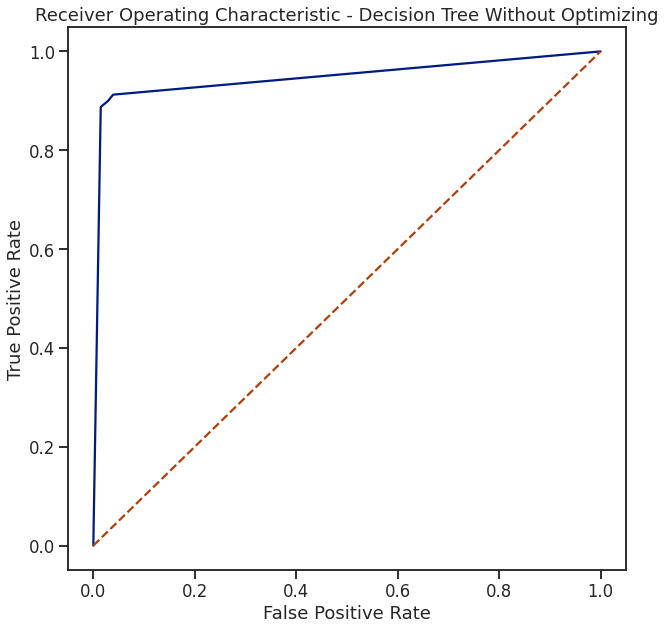

In [181]:
y_score = clf.predict_proba(X_test_dt)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_dt, y_score)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree Without Optimizing')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

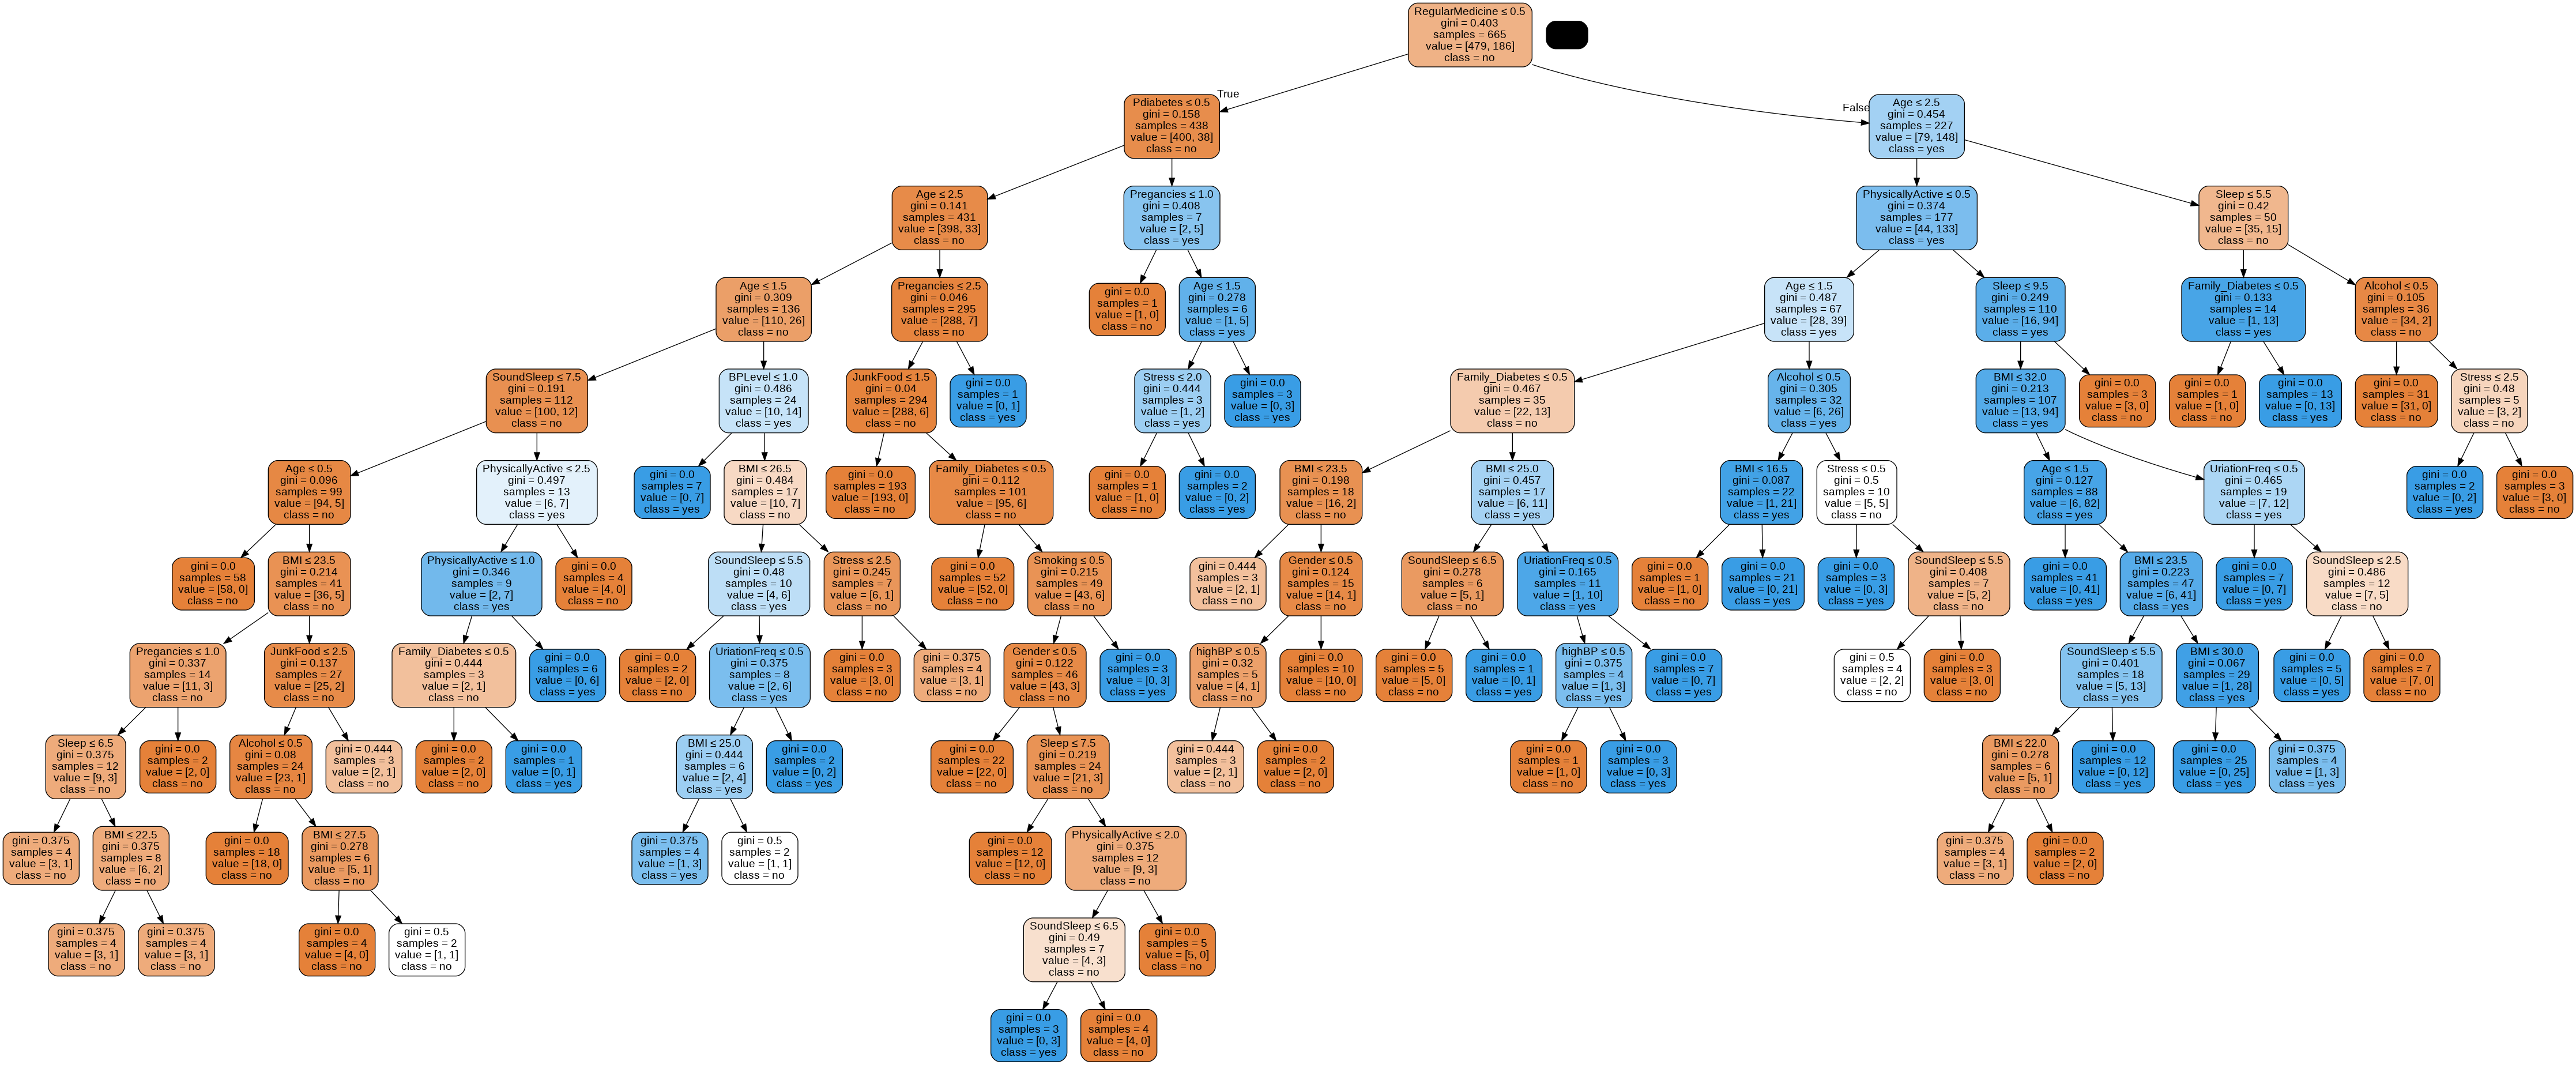

In [182]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train_dt.columns,class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_without_optimizing.png')
Image(graph.create_png())

## 6.1 Optimizing Decision Tree Performance

### 6.1.1 Pre Pruning Techniques

In [183]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train_dt,y_train_dt)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [184]:
model = gcv.best_estimator_
model

DecisionTreeClassifier(criterion='entropy', max_depth=12)

Train Confusion matrix


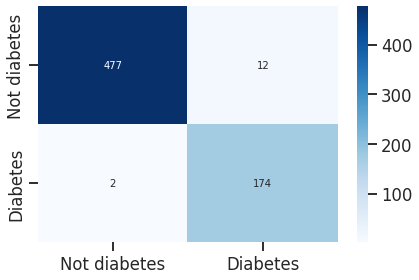

Accuracy:  0.9789473684210527
Classification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       479
           1       0.99      0.94      0.96       186

    accuracy                           0.98       665
   macro avg       0.98      0.97      0.97       665
weighted avg       0.98      0.98      0.98       665

ROC AUC score: 0.9656542528116372


In [185]:
model.fit(X_train_dt,y_train_dt)
y_train_pred_dtWithPrePruning = model.predict(X_train_dt)
y_test_pred_dtWithPrePruning = model.predict(X_test_dt)

# Training Accuracy
plot_confusionmatrix(y_train_pred_dtWithPrePruning,y_train_dt,dom='Train')
print("Accuracy: ", accuracy_score(y_train_dt, y_train_pred_dtWithPrePruning))
print("Classification report: ")
print(classification_report(y_train_dt, y_train_pred_dtWithPrePruning))
print("ROC AUC score:", roc_auc_score(y_train_dt, y_train_pred_dtWithPrePruning))

Test Confusion matrix


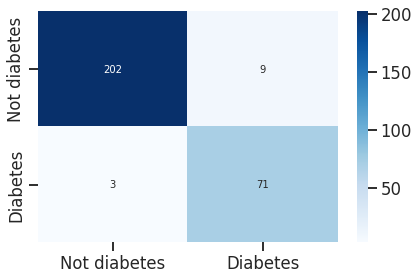

Accuracy:  0.9578947368421052
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       205
           1       0.96      0.89      0.92        80

    accuracy                           0.96       285
   macro avg       0.96      0.94      0.95       285
weighted avg       0.96      0.96      0.96       285

ROC AUC score: 0.9364329268292683


In [186]:
# Testing Accuracy
plot_confusionmatrix(y_test_pred_dtWithPrePruning,y_test_dt,dom='Test')
print("Accuracy: ", accuracy_score(y_test_dt, y_test_pred_dtWithPrePruning))
print("Classification report: ")
print(classification_report(y_test_dt, y_test_pred_dtWithPrePruning))
print("ROC AUC score:", roc_auc_score(y_test_dt, y_test_pred_dtWithPrePruning))

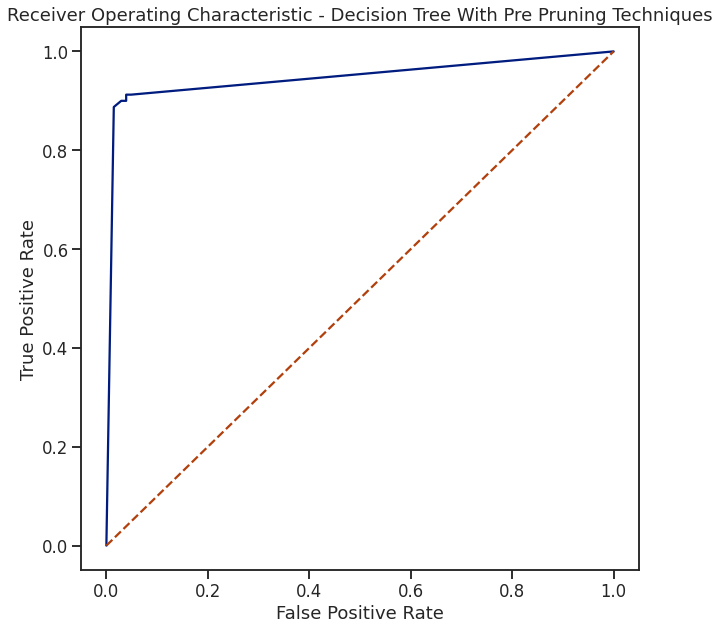

In [187]:
y_score = model.predict_proba(X_test_dt)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_dt, y_score)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree With Pre Pruning Techniques')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

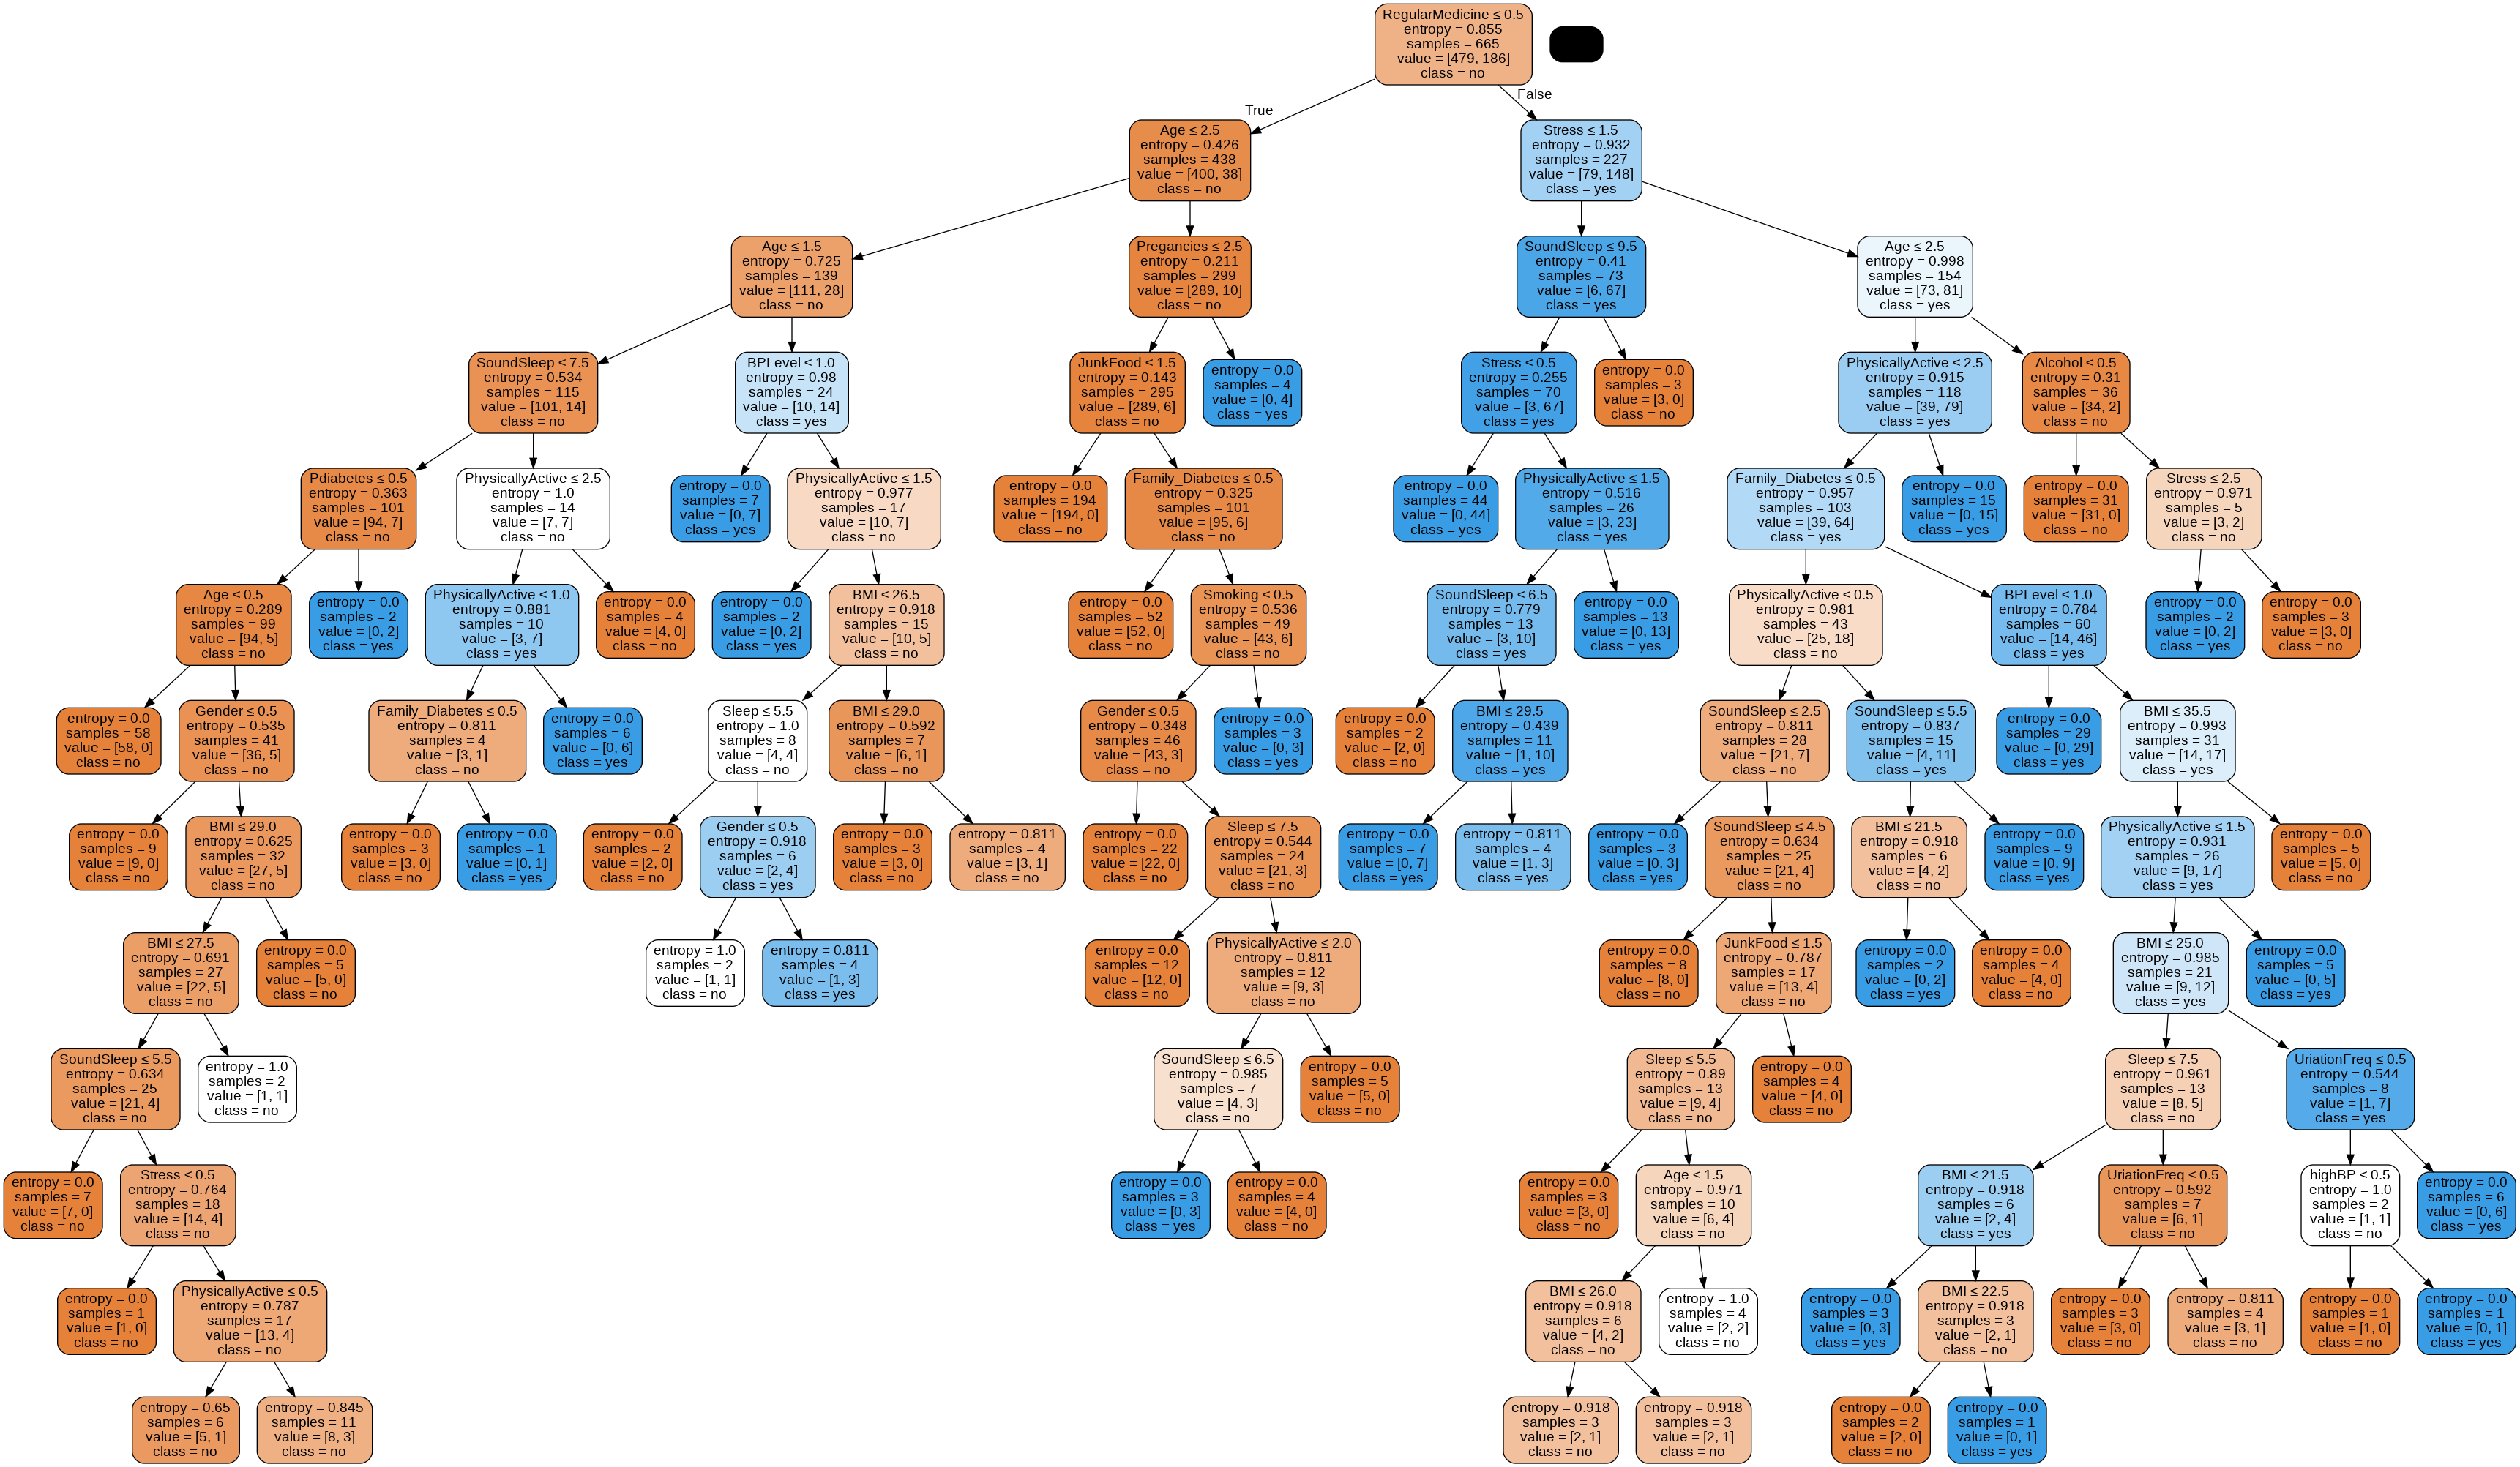

In [188]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train_dt.columns,class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_with_prepruning.png')
Image(graph.create_png())

### 6.1.2 Post Pruning Techniques

In [189]:
path = clf.cost_complexity_pruning_path(X_train_dt, y_train_dt)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.         0.00025063 0.00025063 0.00032223 0.00032223
 0.000401   0.000401   0.00050125 0.00053467 0.00064817 0.00065145
 0.00107438 0.00125313 0.00128894 0.00136705 0.00179019 0.00200501
 0.00210853 0.00250627 0.00264737 0.00267335 0.0027927  0.00284043
 0.00287081 0.00302974 0.00322234 0.00380156 0.00427204 0.00503824
 0.00515996 0.00584426 0.00643588 0.00677343 0.00755278 0.0082287
 0.00953833 0.0099179  0.02310538 0.02389312 0.14365755]


In [190]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_dt, y_train_dt)
    clfs.append(clf)

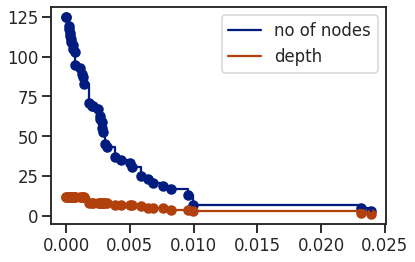

In [191]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

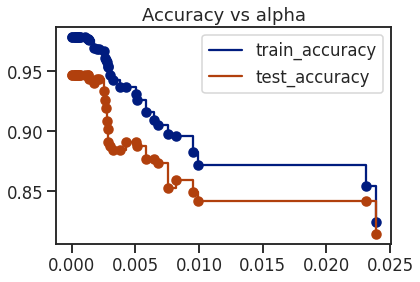

In [192]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred_dt = c.predict(X_train_dt)
    y_test_pred_dt = c.predict(X_test_dt)
    train_acc.append(accuracy_score(y_train_pred_dt,y_train_dt))
    test_acc.append(accuracy_score(y_test_pred_dt,y_test_dt))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

# 7. Naive Bayes


## 7.1 Without scaling the data




In [193]:
#fitting the data into Naive Bayes , GaussianNB model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

X = X_train_naive
y = y_train_naive

GNB = GaussianNB()
cv_N = 4
scores = cross_val_score(GNB, X, y, n_jobs=cv_N, cv=cv_N)
print(scores)
np.mean(scores)

[0.79640719 0.81325301 0.8373494  0.77710843]


0.806029507250559

In [194]:
#Check the data type of each features
X_test_naive.iloc[0:,0:10]
#Binary Data:5
#Discrete Data:4
#Continuous Data:1

Age  Gender  Family_Diabetes  highBP  PhysicallyActive   BMI  Smoking  \
685    3       1                0       0                 1  21.0        0   
191    3       1                1       1                 1  27.0        0   
140    3       0                1       0                 1  24.0        0   
486    3       1                0       0                 2  20.0        0   
660    3       0                1       0                 2  20.0        0   
..   ...     ...              ...     ...               ...   ...      ...   
125    3       0                0       1                 3  30.0        0   
563    2       1                0       1                 0  15.0        0   
446    3       1                0       1                 0  26.0        0   
526    2       1                0       0                 2  18.0        0   
547    2       0                1       1                 0  19.0        0   

     Alcohol  Sleep  SoundSleep  
685        0      7           4  
191        0      7           5  
140        0      8           8  
486        0      7           7  
660        0      9           9  
..       ...    ...         ...  
125        0      7           3  
563        0      4           4  
446        0      6           4  
526        0      5           5  
547        0      9           9  

[285 rows x 10 columns]

In [195]:
#Check the data type of each features
X_test_naive.iloc[0:,10:]
#Binary Data:5 + 3 =   8 
#Discrete Data:4 + 4 = 8
#Continuous Data:1 =   1

RegularMedicine  JunkFood  Stress  BPLevel  Pregancies  Pdiabetes  \
685                0         1       2        2           0          0   
191                0         1       2        0           0          0   
140                1         2       2        2           0          0   
486                0         1       1        2           0          0   
660                0         2       2        2           0          0   
..               ...       ...     ...      ...         ...        ...   
125                0         1       2        2           0          0   
563                1         1       3        0           0          0   
446                0         3       2        2           0          0   
526                0         1       2        2           0          0   
547                1         1       0        0           4          0   

     UriationFreq  
685             1  
191             0  
140             1  
486             0  
660             0  
..            ...  
125             0  
563             1  
446             1  
526             0  
547             1  

[285 rows x 7 columns]

In [196]:
# Compare the cross validation scores for Gaussian, Bernouilli and Multinomial Naive Bayes.
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

X = X_train_naive
y = y_train_naive

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}

scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X, y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'bernoulli': 0.8225867542024385,
 'gaussian': 0.806029507250559,
 'multinomial': 0.8029904047327032}

Gaussian results are ok but the data set only have 1 feature that is in continous.

BernoulliNB doing the best when 
MutlinomialNB both are doing good because the the data set have average features of binary and discreate data which the number of features are 8.



----


This codes explores how Naive Bayes algorithms can be affected when we push the underlying (naive) assumption too much. Recall that the naive assumption is that the features in the training set are independent from each other.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



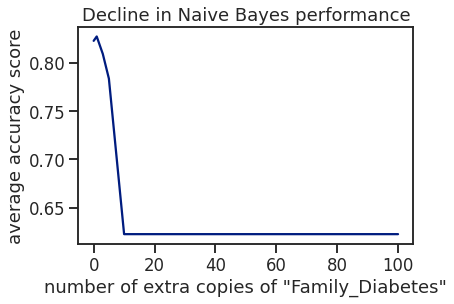

In [197]:
from sklearn.naive_bayes import BernoulliNB

X = X_train_naive
y = y_train_naive

# Create 0, 1, 3, 5, 10, 50, 100 copies of sepal_length and fit a BernoulliNb for each one.
n_copies = [0,1,3,5,10,50,100]

def create_copies_Family_Diabetes(X, n):
    X_new = X.copy()
    for i in range(n):
        X_new['Family_Diabetes_copy%s' % i] = X['Family_Diabetes']
    return X_new


def get_cross_val_score(n):
    X_new = create_copies_Family_Diabetes(X, n)
    scores = cross_val_score(BernoulliNB(), X_new, y, cv=cv_N, n_jobs=cv_N)
    return np.mean(scores)


# save the average cross_val_score
avg_scores = pd.Series(
    [get_cross_val_score(n) for n in n_copies],
    index=n_copies)


# Create a plot of the saved scores over the number of copies.

ax = avg_scores.plot()
ax.set(
    xlabel='number of extra copies of "Family_Diabetes"',
    ylabel='average accuracy score',
    title='Decline in Naive Bayes performance');


When there is about 10 extra copies of Family_Diabetes features , the decline of the Naive Bayes is the loweest with average accuracy score of 0.625.


---







In [198]:
#BernoulliNB has the best result from previous codes but here we still will try with different Naive Bayes models
#BernoulliNB performance 
BNB = BernoulliNB()
BNB.fit(X_train_naive, y_train_naive)
y_pred_naive = BNB.predict(X_test_naive)

print(accuracy_score(y_test_naive, y_pred_naive))
print(classification_report(y_test_naive, y_pred_naive))
print(roc_auc_score(y_test_naive, y_pred_naive))

0.8105263157894737
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       205
           1       0.67      0.64      0.65        80

    accuracy                           0.81       285
   macro avg       0.77      0.76      0.76       285
weighted avg       0.81      0.81      0.81       285

0.7577743902439024


In [199]:
#GaussianNB performance
GNB = GaussianNB()
GNB.fit(X_train_naive, y_train_naive)
y_pred_naive1 = GNB.predict(X_test_naive)

print(accuracy_score(y_test_naive, y_pred_naive1))
print(classification_report(y_test_naive, y_pred_naive1))
print(roc_auc_score(y_test_naive, y_pred_naive1))

0.8175438596491228
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       205
           1       0.68      0.68      0.68        80

    accuracy                           0.82       285
   macro avg       0.77      0.77      0.77       285
weighted avg       0.82      0.82      0.82       285

0.7740853658536586


In [200]:
#MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train_naive, y_train_naive)
y_pred_naive2 = MNB.predict(X_test_naive)

print(accuracy_score(y_test_naive, y_pred_naive2))
print(classification_report(y_test_naive, y_pred_naive2))
print(roc_auc_score(y_test_naive, y_pred_naive2))

0.7929824561403509
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       205
           1       0.62      0.66      0.64        80

    accuracy                           0.79       285
   macro avg       0.74      0.75      0.75       285
weighted avg       0.80      0.79      0.79       285

0.7532012195121952


GaussianNB has the best accuracy which is 0.82 and the best roc_auc_score which is 0.79

----------------------



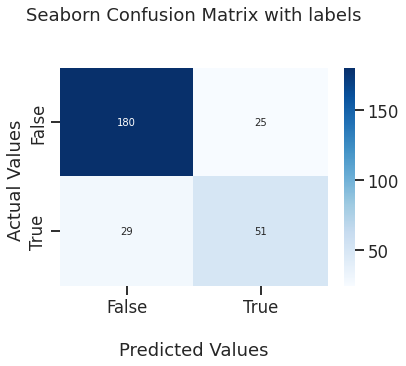

In [201]:
#Confusion matrix for BernoulliNB
clf = confusion_matrix(y_test_naive, y_pred_naive)

ax = sns.heatmap(clf, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

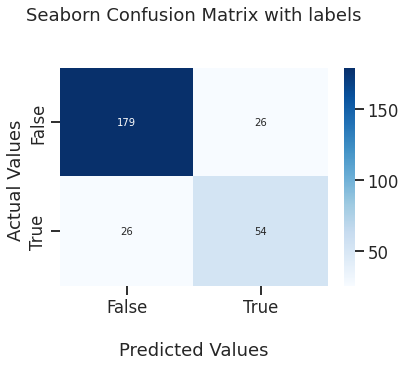

In [202]:
#Confusion matrix for GaussianNB
clf = confusion_matrix(y_test_naive, y_pred_naive1)

ax = sns.heatmap(clf, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

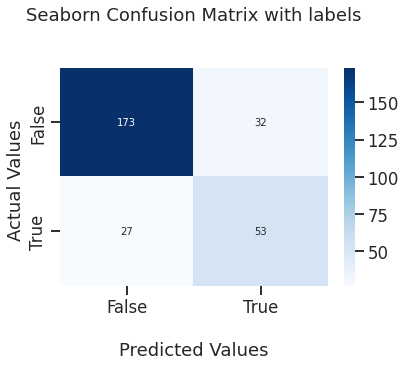

In [203]:
#Confusion matrix for MultinomialNB
clf = confusion_matrix(y_test_naive, y_pred_naive2)

ax = sns.heatmap(clf, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## 7.2 MinMax Scaler


In [204]:
from sklearn.preprocessing import MinMaxScaler
scalerNB = MinMaxScaler()
X_train_naiveMin = scalerNB.fit_transform(X_train_naive)
X_test_naiveMin = scalerNB.transform(X_test_naive)

In [205]:
#BernoulliNB performance 
BNB = BernoulliNB()
BNB.fit(X_train_naiveMin, y_train_naive)
y_pred_naive3 = BNB.predict(X_test_naiveMin)

print(accuracy_score(y_test_naive, y_pred_naive3))
print(classification_report(y_test_naive, y_pred_naive3))
print(roc_auc_score(y_test_naive, y_pred_naive3))

0.8105263157894737
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       205
           1       0.68      0.61      0.64        80

    accuracy                           0.81       285
   macro avg       0.77      0.75      0.76       285
weighted avg       0.81      0.81      0.81       285

0.7501524390243903


In [206]:
#GaussianNB performance
GNB = GaussianNB()
GNB.fit(X_train_naiveMin, y_train_naive)
y_pred_naive4 = GNB.predict(X_test_naiveMin)

print(accuracy_score(y_test_naive, y_pred_naive4))
print(classification_report(y_test_naive, y_pred_naive4))
print(roc_auc_score(y_test_naive, y_pred_naive4))

0.8175438596491228
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       205
           1       0.68      0.68      0.68        80

    accuracy                           0.82       285
   macro avg       0.77      0.77      0.77       285
weighted avg       0.82      0.82      0.82       285

0.7740853658536586


In [207]:
#MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train_naiveMin, y_train_naive)
y_pred_naive5 = MNB.predict(X_test_naiveMin)

print(accuracy_score(y_test_naive, y_pred_naive5))
print(classification_report(y_test_naive, y_pred_naive5))
print(roc_auc_score(y_test_naive, y_pred_naive5))

0.8210526315789474
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       205
           1       0.72      0.60      0.65        80

    accuracy                           0.82       285
   macro avg       0.78      0.75      0.77       285
weighted avg       0.81      0.82      0.82       285

0.753658536585366


Only the accuracy of the MultinomialNB increase to 0.82 from 0.79 after using the minmax scaler.The best model is using the MutlinomialNB without scaling the data


-------



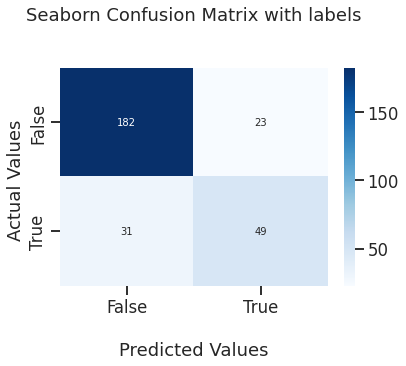

In [208]:
#Confusion matrix for BernoulliNB
clf = confusion_matrix(y_test_naive, y_pred_naive3)

ax = sns.heatmap(clf, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

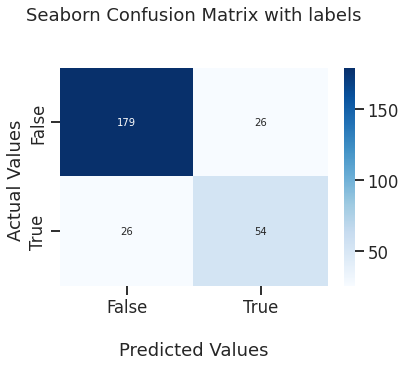

In [209]:
#Confusion matrix for GaussianNB
clf = confusion_matrix(y_test_naive, y_pred_naive4)

ax = sns.heatmap(clf, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

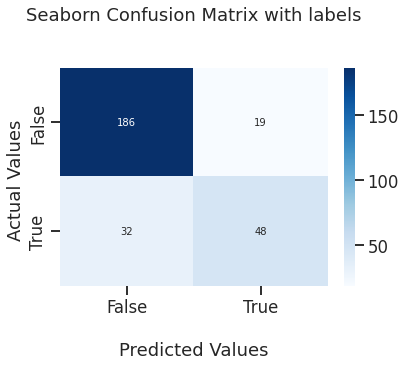

In [210]:
#Confusion matrix for MultinomialNB
clf = confusion_matrix(y_test_naive, y_pred_naive5)

ax = sns.heatmap(clf, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion matrix for MultinomialNB has increase the FP which is from 173
counts to 186 counts

----


## 7.3 ROC Curve

In [211]:
#ROC is the receiver operating characteristic AUROC is the area under the ROC curve
r_NB = [0 for _ in range(len(y_test_naive))]
##Get the probability of the prediction
prob_MNB = MNB.predict_proba(X_test_naive)
##Keep the positive outcome
prob_MNB = prob_MNB[:, 1]
roc_auc = roc_auc_score(y_test_naive, r_NB)
MNB_auc = roc_auc_score(y_test_naive, prob_MNB)
print('KNN: AUROC = %.3f' % (MNB_auc))

KNN: AUROC = 0.845


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but MultinomialNB was fitted without feature names



In [212]:
roc_fpr, roc_tpr, _ = roc_curve(y_test_naive, r_NB)
MNB_fpr, MNB_tpr, _ = roc_curve(y_test_naive, prob_MNB)

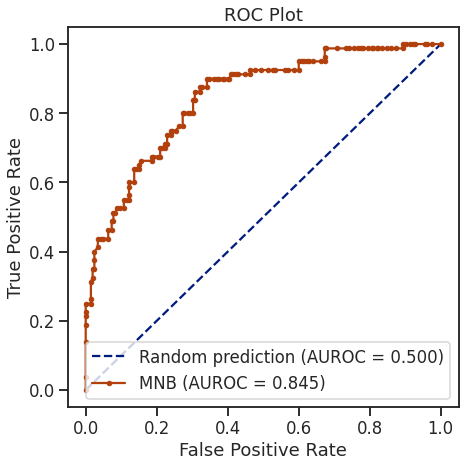

In [213]:
plt.figure(figsize=(7, 7))
plt.plot(roc_fpr, roc_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % roc_auc)
plt.plot(MNB_fpr, MNB_tpr, marker='.', label='MNB (AUROC = %0.3f)' % MNB_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show legend
plt.legend() # 
# Show plot
plt.show()

Mutlinomail Naive Bayes has the ROC plot value is 0.846 which the model is doing good which 84.6% of the time the model can predit successful a diabetes patients with a diabetes label.

# 8. Support Vector Machine (SVM)

## 8.1 Without Standard Scaler

In [214]:
# SVM Classifier model
svm_clf = SVC()
svm_clf.fit(X_train_svm, y_train_svm)

SVC()

Train Confusion matrix


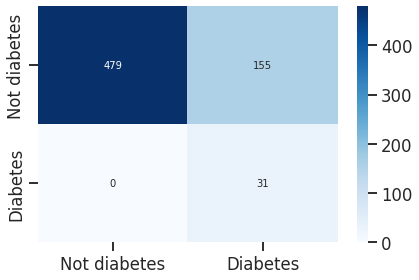

Accuracy:  0.7669172932330827
Classification report: 
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       479
           1       1.00      0.17      0.29       186

    accuracy                           0.77       665
   macro avg       0.88      0.58      0.57       665
weighted avg       0.82      0.77      0.70       665

ROC AUC score: 0.5833333333333334


In [215]:
y_train_pred_svm = svm_clf.predict(X_train_svm)
y_test_pred_svm = svm_clf.predict(X_test_svm)

# Training Accuracy
plot_confusionmatrix(y_train_pred_svm,y_train_svm,dom='Train')
print("Accuracy: ", accuracy_score(y_train_svm, y_train_pred_svm))
print("Classification report: ")
print(classification_report(y_train_svm, y_train_pred_svm))
print("ROC AUC score:", roc_auc_score(y_train_svm, y_train_pred_svm))

Test Confusion matrix


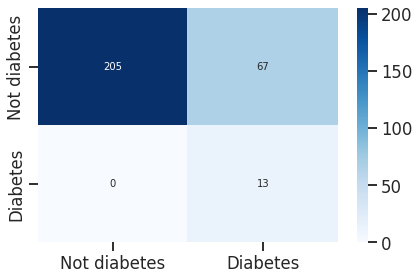

Accuracy:  0.7649122807017544
Classification report: 
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       205
           1       1.00      0.16      0.28        80

    accuracy                           0.76       285
   macro avg       0.88      0.58      0.57       285
weighted avg       0.82      0.76      0.70       285

ROC AUC score: 0.58125


In [216]:
# Testing Accuracy
plot_confusionmatrix(y_test_pred_svm,y_test_svm,dom='Test')
print("Accuracy: ", accuracy_score(y_test_svm, y_test_pred_svm))
print("Classification report: ")
print(classification_report(y_test_svm, y_test_pred_svm))
print("ROC AUC score:", roc_auc_score(y_test_svm, y_test_pred_svm))

TypeError: ignored

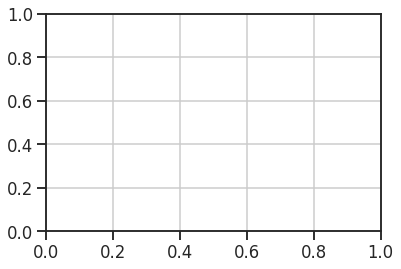

In [217]:
fpr, tpr, thresholds = roc_curve(y_test_svm, y_test_pred_svm)

plt.grid()

plt.plot(fpr, tpr, label=" AUC TEST ="+str(auc(fpr, tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## 8.2 With Standard Scaler

In [218]:
scaler = StandardScaler()
X_train_svm_scaled = scaler.fit_transform(X_train_svm)
X_test_svm_scaled = scaler.fit_transform(X_test_svm)
svm_clf.fit(X_train_svm_scaled, y_train_svm)

SVC()

Train Confusion matrix


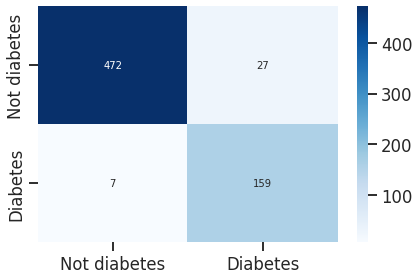

Accuracy:  0.9488721804511279
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       479
           1       0.96      0.85      0.90       186

    accuracy                           0.95       665
   macro avg       0.95      0.92      0.93       665
weighted avg       0.95      0.95      0.95       665

ROC AUC score: 0.9201124654858914


In [219]:
y_train_pred_svmWithScaler = svm_clf.predict(X_train_svm_scaled)
y_test_pred_svmWithScaler = svm_clf.predict(X_test_svm_scaled)

# Training Accuracy
plot_confusionmatrix(y_train_pred_svmWithScaler,y_train_svm,dom='Train')
print("Accuracy: ", accuracy_score(y_train_svm, y_train_pred_svmWithScaler))
print("Classification report: ")
print(classification_report(y_train_svm, y_train_pred_svmWithScaler))
print("ROC AUC score:", roc_auc_score(y_train_svm, y_train_pred_svmWithScaler))

Test Confusion matrix


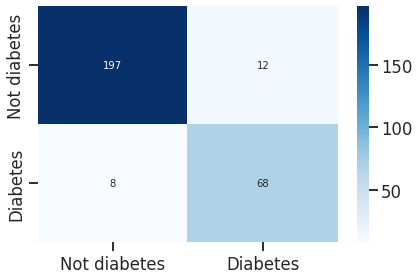

Accuracy:  0.9298245614035088
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       205
           1       0.89      0.85      0.87        80

    accuracy                           0.93       285
   macro avg       0.92      0.91      0.91       285
weighted avg       0.93      0.93      0.93       285

ROC AUC score: 0.9054878048780488


In [220]:
# Testing Accuracy
plot_confusionmatrix(y_test_pred_svmWithScaler,y_test_svm,dom='Test')
print("Accuracy: ", accuracy_score(y_test_svm, y_test_pred_svmWithScaler))
print("Classification report: ")
print(classification_report(y_test_svm, y_test_pred_svmWithScaler))
print("ROC AUC score:", roc_auc_score(y_test_svm, y_test_pred_svmWithScaler))

TypeError: ignored

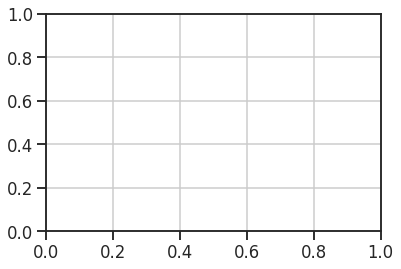

In [221]:
fpr, tpr, thresholds = roc_curve(y_test_svm, y_test_pred_svmWithScaler)

plt.grid()

plt.plot(fpr, tpr, label=" AUC TEST ="+str(auc(fpr, tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# 9. Neural Network

In [222]:
# determine the number of input features
n_features = X_train_nn.shape[1]

In [223]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                180       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


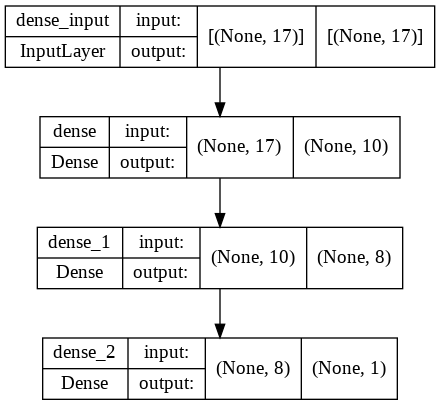

In [224]:
# summarize the model
model.summary()
plot_model(model, 'model.png', show_shapes=True)

In [225]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [226]:
# fit the model
history = model.fit(X_train_nn, y_train_nn, epochs=150, batch_size=32,validation_split=0.3)

Epoch 1/150
15/15 [==============================] - 2s 45ms/step - loss: 0.7358 - accuracy: 0.2753 - val_loss: 0.7118 - val_accuracy: 0.3150
Epoch 2/150
15/15 [==============================] - 0s 9ms/step - loss: 0.7045 - accuracy: 0.3785 - val_loss: 0.6910 - val_accuracy: 0.4750
Epoch 3/150
15/15 [==============================] - 0s 10ms/step - loss: 0.6793 - accuracy: 0.5161 - val_loss: 0.6638 - val_accuracy: 0.6100
Epoch 4/150
15/15 [==============================] - 0s 10ms/step - loss: 0.6394 - accuracy: 0.6581 - val_loss: 0.6321 - val_accuracy: 0.7100
Epoch 5/150
15/15 [==============================] - 0s 14ms/step - loss: 0.5975 - accuracy: 0.7140 - val_loss: 0.6032 - val_accuracy: 0.6950
Epoch 6/150
15/15 [==============================] - 0s 12ms/step - loss: 0.5739 - accuracy: 0.7312 - val_loss: 0.5919 - val_accuracy: 0.6950
Epoch 7/150
15/15 [==============================] - 0s 19ms/step - loss: 0.5633 - accuracy: 0.7312 - val_loss: 0.5823 - val_accuracy: 0.6950
Epoch 8

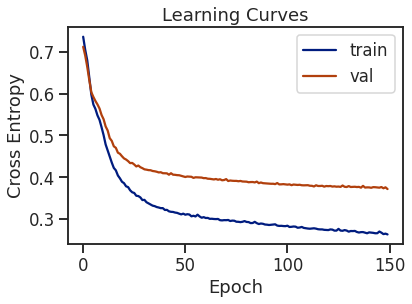

In [227]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [228]:
# evaluate the model
loss, acc = model.evaluate(X_test_nn, y_test_nn)
print('Test Accuracy: %.3f' % acc)

9/9 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8491
Test Accuracy: 0.849




---

#Buid a predictive system

In [229]:
knn = KNeighborsClassifier(n_neighbors =3, weights = 'distance',metric= 'manhattan')
knn.fit(X_data, y_data)

input_data = (1,1,0,1,0,28.0,0,0,8,6,1,3,2,2,0,0,0)

##CHANGE THE INPUT TO NUMPY ARRAY
input_data_as_numpy_array = np.asarray(input_data)
#RESHAPE THE NUMPY ARRAY BECAUSE WE NEED TO PREDICT THE TARGET
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



std_data = scaler2.fit_transform(input_data_reshaped)
prediction = knn.predict(input_data_reshaped)

if prediction[0] == 0:
  print('The patient does not have a Diabetes')
else:
  print('The patient has a Diabetes')


The patient does not have a Diabetes


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [230]:
print(data.iloc[1])

Age                  1.0
Gender               1.0
Family_Diabetes      0.0
highBP               1.0
PhysicallyActive     0.0
BMI                 28.0
Smoking              0.0
Alcohol              0.0
Sleep                8.0
SoundSleep           6.0
RegularMedicine      1.0
JunkFood             3.0
Stress               2.0
BPLevel              2.0
Pregancies           0.0
Pdiabetes            0.0
UriationFreq         0.0
Diabetic             0.0
Name: 1, dtype: float64
